# SC1015 Mini Project Z137 Team 6
## Project Title: Analysis of 2015 Gorkha Earthquake in Nepal

### Members
<ul>
    <li> Caren Tan Xin Yao </li>
    <li>Joelle Chew Ningxi</li>
    <li>Lee Bohui</li>
</ul>

### Introduction to our project

<p style="line-height= 1.5"> Our chosen dataset is the 2015 Nepal Earthquake building structural damage and repair dataset. The dataset that we will be using was aimed to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. The Earthquake had a magnitude of 6.5, followed by an aftershock of roughly 5.0 magnitude.</p>

<p style="line-height= 1.5">  Our group's perspective is that earthquake's are costly and disastrous depending on the preparations made beforehand. If we do not prepare for it, it is highly unlikely that we might come out of the disaster unscathed. Through this project, we hope to be able to apply the findings of our project to help us predict the amount of damage caused by earthquakes depending on the condition and make of buildings in the future. Subsequently, we would also like to understand whether the age of a building can contribute to the building's damage since it takes corrosion and deterioration into account. </p>

<ol>So, our group has defined a two new problem statements based on this dataset. 
    <li>"Which building materials contribute to the building's damage grade?"</li>
    <li>"Does building age contribute to damage grade?"</li>
</ol>

<h2> Contents of Project </h2>

<ol >
    <li>Data Preprocessing/Preparation - Joelle &#38; Caren</li>
    <li>Explatory Data Analysis -Joelle &#38; Caren </li>
    <li>Preparation of Data before Machine Learning 
        <ul>
            <li>Associations  - Bohui</li>
            <li>Chi Square - Joelle</li>
        </ul>
    </li>
    <li>Machine Learning 
        <ul>
            <li>Logistic Regression - Caren &#38; Bohui</li>
            <li>Random Forest - Bohui</li>
        </ul>
    </li>
    <li>Conclusion - Joelle, Caren &#38; Bohui</li>
</ol>

In [1]:
# Basic Libraries
from dython.nominal import associations
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from IPython.display import Image

import graphviz
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

sb.set() # set the default Seaborn style for graphics

In [2]:
eq_data = pd.read_csv ("csv_building_structure.csv")
eq_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [3]:
print("Data type:", type(eq_data))
print("Data dims:", eq_data.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dims: (762106, 31)


In [4]:
print(eq_data.dtypes)

building_id                                int64
district_id                                int64
vdcmun_id                                  int64
ward_id                                    int64
count_floors_pre_eq                        int64
count_floors_post_eq                       int64
age_building                               int64
plinth_area_sq_ft                          int64
height_ft_pre_eq                           int64
height_ft_post_eq                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_c

# 1. Data Cleaning


<p style="line-height= 1.5"> 
With a rough look into our dataset, there are some unwanted variables that we will be dropping.  We will remove the columns ‘building_id’, 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq’, 'position', 'plan_configuration', 'condition_post_eq', and 'technical_solution_proposed' as we felt that they did not have any relation to the building structure and building material which are our main focus.  In addition, the building ID's are in some form of encrypted character, and each ID is not unique from another. Thus, it is not necessary for us to include the building ID in our dataset, as each row in the dataset represents a building.
</p>

<p style="line-height= 1.5"> 
As for the buildings area square foot and height, they might seem to be necessary, but given that the shape of the building is not provided, it is not useful in helping us investigate our problem.
</p>

In [5]:
#Remove unnecessary variables
eq_data_clean = eq_data.drop (['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'position', 'plan_configuration', 'condition_post_eq', 'technical_solution_proposed'], axis=1)


### We visualize our numeric variable, age_building (ie. age of building) using a boxplot and found that the age ranges from 0 to 200 before jumping straight to 999.  Based on our observation of the dataset, building's with the age value of 999 are presumably buildings of which with no indication or information of when it was built. Another way to perceive why the age value is 999 is that the building is a historical building that had existed a century ago.  Since this outlier will heavily affect our analysis by providing a skewed result, it is not relevant to our analysis, and we will remove the rows with 999 for age_building from the dataset.

In [6]:
#Check range/distribution of building age
age = eq_data_clean['age_building']
age.describe()

count    762106.000000
mean         24.326405
std          65.043704
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

<AxesSubplot:>

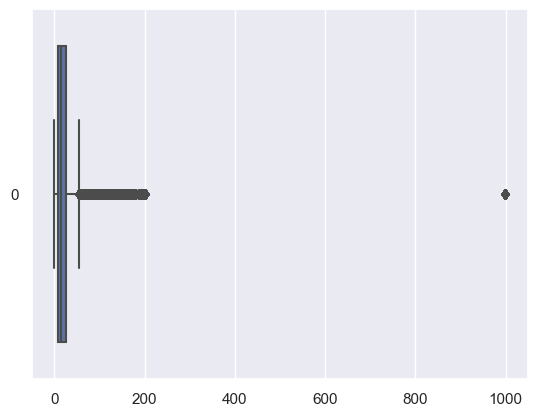

In [7]:
#Boxplot BEFORE dropping age value of 999 and above
sb.boxplot(data = age, orient = "h")

In [8]:
#Remove buildings with age value of 999 and above
eq_data_clean.drop(eq_data_clean[eq_data_clean['age_building'] >= 999].index, inplace = True)

<AxesSubplot:>

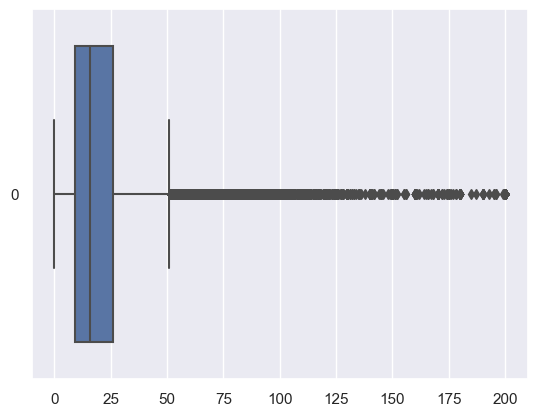

In [9]:
#Boxplot AFTER dropping age value of 999 and above
sb.boxplot(data = eq_data_clean['age_building'], orient = "h")

<p style="line-height= 1.5"> There are null values in the column ‘damage_grade’.  So, we found the mode of this variable and replace the null values with the mode value.</p>

In [10]:
#Check which variable has null values
print(eq_data_clean.isnull().sum())

age_building                               0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_superstructure_bamboo                  0
has_superstructure_rc_non_engineered       0
has_superstructure_rc_engineered           0
has_superstructure_other                   0
damage_grade                              11
dtype: int64


In [11]:
#Find the mode of values
eq_data_clean.mode()

,age_building,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,0,1,0,0,0,0,0,0,0,0,0,Grade 5


In [12]:
#Replace NA value with Mode value
eq_data_clean["damage_grade"].fillna(value = "Grade 5", inplace = True)

In [13]:
eq_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758961 entries, 0 to 762105
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   age_building                            758961 non-null  int64 
 1   land_surface_condition                  758961 non-null  object
 2   foundation_type                         758961 non-null  object
 3   roof_type                               758961 non-null  object
 4   ground_floor_type                       758961 non-null  object
 5   other_floor_type                        758961 non-null  object
 6   has_superstructure_adobe_mud            758961 non-null  int64 
 7   has_superstructure_mud_mortar_stone     758961 non-null  int64 
 8   has_superstructure_stone_flag           758961 non-null  int64 
 9   has_superstructure_cement_mortar_stone  758961 non-null  int64 
 10  has_superstructure_mud_mortar_brick     758961 non-null 

<p style="line-height= 1.5"> Our original dataset size consisted of around 700,000 values, so we decided to cut the dataset size to around 300,000</p>

In [14]:
#check the numbers of rows
print("Data dims:", eq_data_clean.shape)

Data dims: (758961, 18)


In [15]:
#Cut down dataset to around 300k
eq_data_clean = eq_data_clean.sample(frac=0.4)
print("Data type:", type(eq_data_clean))
print("Data dims:", eq_data_clean.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dims: (303584, 18)


# 2. Exploratory Data Analysis

<p style="line-height= 1.5">  Here, we will plot a box-plot and histogram for our numerical data, 'age_building', to observe its relationship with 'damage_grade', if any. </p>

### Building Age
#### Boxplot

<AxesSubplot:xlabel='age_building', ylabel='damage_grade'>

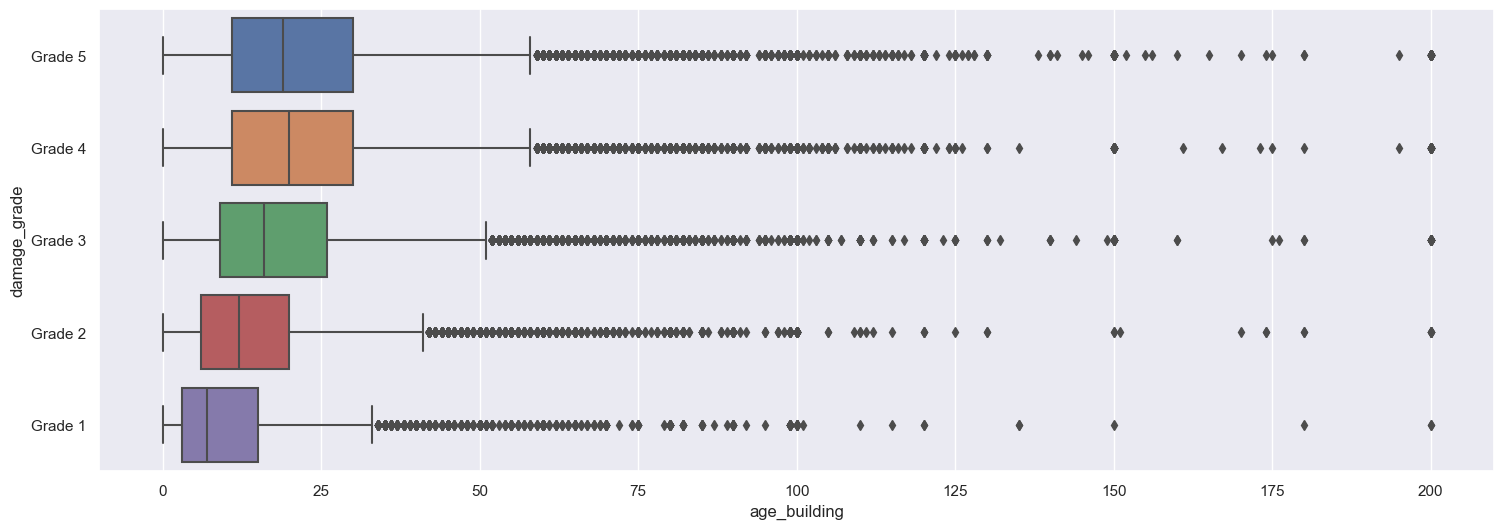

In [16]:
#boxplot of age_building against damage_grade
f = plt.figure(figsize=(18, 6))
ranks = eq_data_clean.groupby(by=["damage_grade"])["age_building"].median().iloc[::-1].index
sb.boxplot(x = "age_building", y = "damage_grade", data = eq_data_clean, orient = "h", order=ranks)

### Histogram

array([[<AxesSubplot:title={'center':'Grade 1'}>,
        <AxesSubplot:title={'center':'Grade 2'}>],
       [<AxesSubplot:title={'center':'Grade 3'}>,
        <AxesSubplot:title={'center':'Grade 4'}>],
       [<AxesSubplot:title={'center':'Grade 5'}>, <AxesSubplot:>]],
      dtype=object)

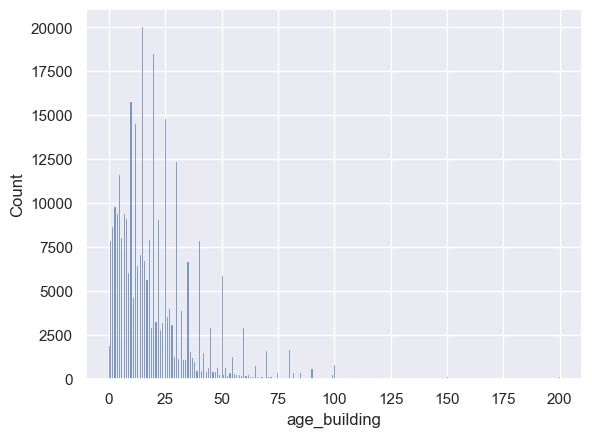

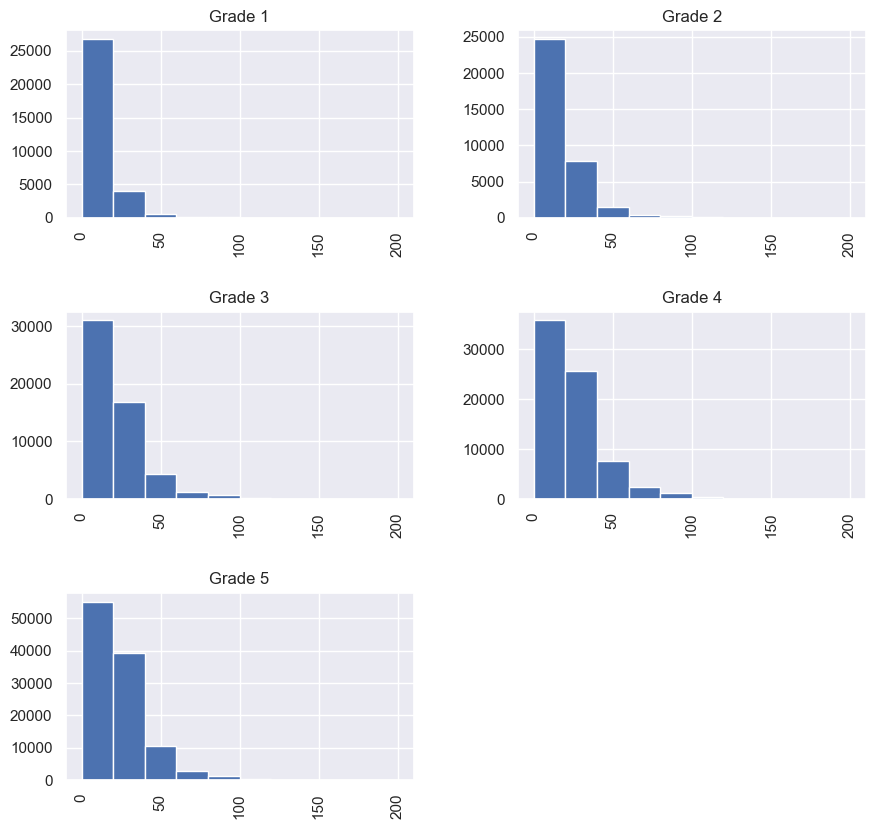

In [17]:
#histogram for age_building
sb.histplot(data = eq_data_clean["age_building"])
eq_data_clean.hist(by='damage_grade', column = 'age_building', figsize=(10, 10))

<p style="line-height= 1.5">  Then, we will plot bar graphs for our categorical data to help us visualize and have a brief overview on the distribution of data over each variable's category.</p>

### Damage Grade
#### Bar graph

Grade 5    110114
Grade 4     73076
Grade 3     54241
Grade 2     34745
Grade 1     31408
Name: damage_grade, dtype: int64


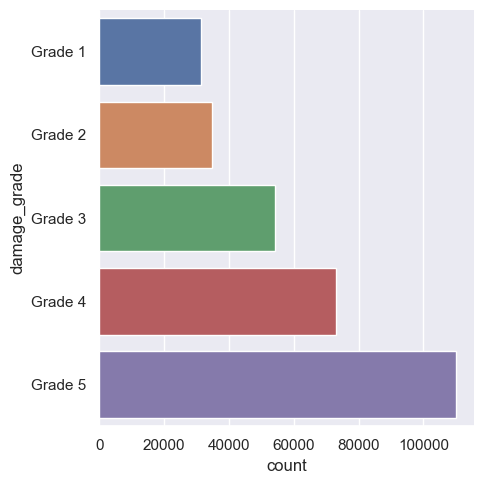

In [18]:
print(eq_data_clean["damage_grade"].value_counts())
rank=["Grade 1","Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y = "damage_grade", data = eq_data_clean, kind = "count", order=rank)

### Foundation Type
#### Bar graph

Mud mortar-Stone/Brick    250414
Bamboo/Timber              22995
Cement-Stone/Brick         15535
RC                         12780
Other                       1860
Name: foundation_type, dtype: int64
damage_grade  foundation_type       
Grade 1       Bamboo/Timber               6866
              Cement-Stone/Brick          4653
              Mud mortar-Stone/Brick     11663
              Other                        576
              RC                          7650
Grade 2       Bamboo/Timber               5409
              Cement-Stone/Brick          3495
              Mud mortar-Stone/Brick     22300
              Other                        162
              RC                          3379
Grade 3       Bamboo/Timber               5285
              Cement-Stone/Brick          2837
              Mud mortar-Stone/Brick     44690
              Other                        180
              RC                          1249
Grade 4       Bamboo/Timber               3310
          

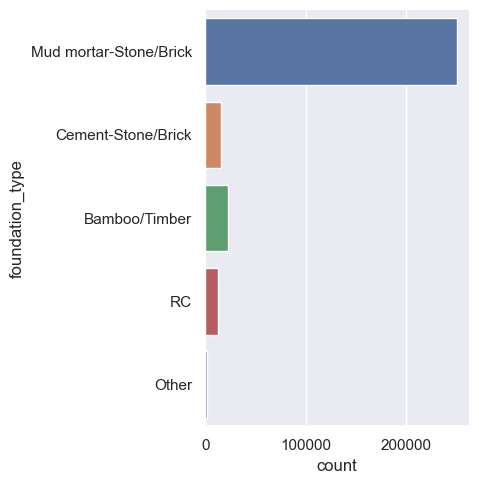

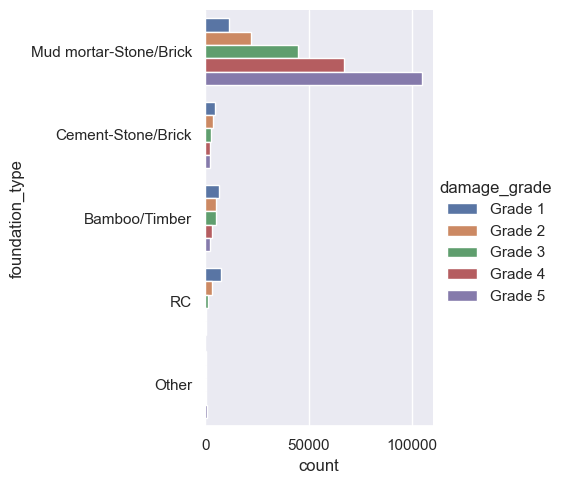

In [19]:
#bargraph for foundation_type
print(eq_data_clean["foundation_type"].value_counts())
sb.catplot(y = "foundation_type", data = eq_data_clean, kind = "count")

#bargraph of foundation_type against damage_grade
print(eq_data_clean[['damage_grade','foundation_type']].groupby(['damage_grade','foundation_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="foundation_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

### Ground Floor Type
#### Bar graph

Mud            246184
RC              29148
Brick/Stone     26397
Timber           1431
Other             424
Name: ground_floor_type, dtype: int64
damage_grade  ground_floor_type
Grade 1       Brick/Stone           2349
              Mud                  15110
              Other                  124
              RC                   13543
              Timber                 282
Grade 2       Brick/Stone           2690
              Mud                  23747
              Other                   70
              RC                    7991
              Timber                 247
Grade 3       Brick/Stone           4325
              Mud                  45287
              Other                  102
              RC                    4317
              Timber                 210
Grade 4       Brick/Stone           6568
              Mud                  64204
              Other                   70
              RC                    1950
              Timber                 284


(0.0, 100000.0)

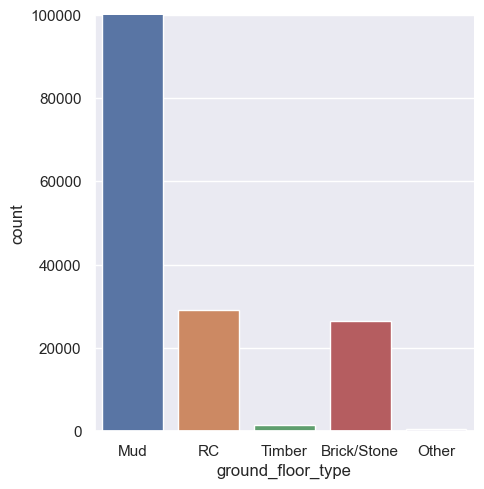

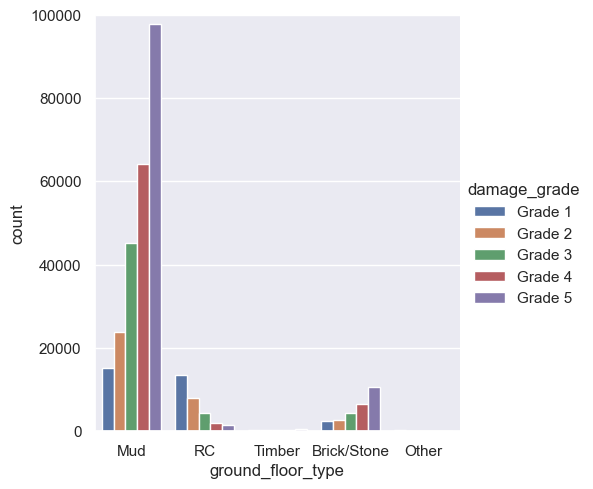

In [20]:
#bargraph for ground_floor_type
print(eq_data_clean["ground_floor_type"].value_counts())
plotgft=sb.catplot(x = "ground_floor_type", data = eq_data_clean, kind = "count")
plotgft.set(ylim=(0, 100000))

#bargraph of ground_floor_type against damage_grade
print(eq_data_clean[['damage_grade','ground_floor_type']].groupby(['damage_grade','ground_floor_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="ground_floor_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)
plt.ylim([0, 100000])

### Other Floor Type
#### Bar graph

TImber/Bamboo-Mud    193699
Timber-Planck         49306
Not applicable        47417
RCC/RB/RBC            13162
Name: other_floor_type, dtype: int64
damage_grade  other_floor_type 
Grade 1       Not applicable       12091
              RCC/RB/RBC            6732
              TImber/Bamboo-Mud     7985
              Timber-Planck         4600
Grade 2       Not applicable        8513
              RCC/RB/RBC            3581
              TImber/Bamboo-Mud    17300
              Timber-Planck         5351
Grade 3       Not applicable        7238
              RCC/RB/RBC            1708
              TImber/Bamboo-Mud    36941
              Timber-Planck         8354
Grade 4       Not applicable        6240
              RCC/RB/RBC             653
              TImber/Bamboo-Mud    55410
              Timber-Planck        10773
Grade 5       Not applicable       13335
              RCC/RB/RBC             488
              TImber/Bamboo-Mud    76063
              Timber-Planck        20228

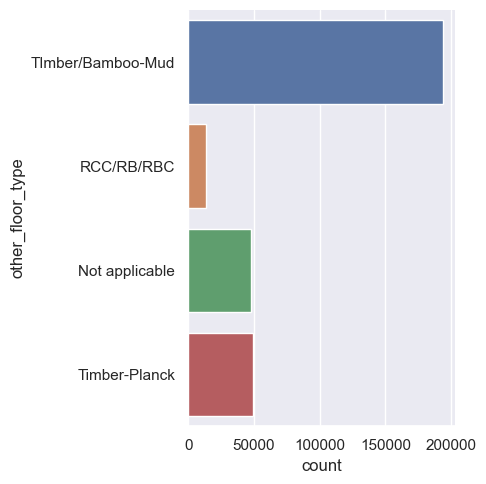

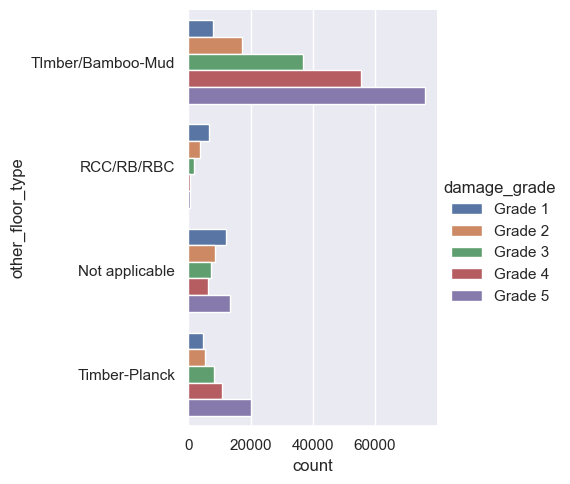

In [21]:
#bargraph for other_floor_type
print(eq_data_clean["other_floor_type"].value_counts())
sb.catplot(y = "other_floor_type", data = eq_data_clean, kind = "count")

#bargraph of other_floor_type against damage_grade
print(eq_data_clean[['damage_grade','other_floor_type']].groupby(['damage_grade','other_floor_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="other_floor_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

### Roof Type
#### Bar graph

Bamboo/Timber-Light roof    200893
Bamboo/Timber-Heavy roof     84914
RCC/RB/RBC                   17777
Name: roof_type, dtype: int64
damage_grade  roof_type               
Grade 1       Bamboo/Timber-Heavy roof     5419
              Bamboo/Timber-Light roof    16300
              RCC/RB/RBC                   9689
Grade 2       Bamboo/Timber-Heavy roof     8874
              Bamboo/Timber-Light roof    20993
              RCC/RB/RBC                   4878
Grade 3       Bamboo/Timber-Heavy roof    16387
              Bamboo/Timber-Light roof    35717
              RCC/RB/RBC                   2137
Grade 4       Bamboo/Timber-Heavy roof    20567
              Bamboo/Timber-Light roof    51860
              RCC/RB/RBC                    649
Grade 5       Bamboo/Timber-Heavy roof    33667
              Bamboo/Timber-Light roof    76023
              RCC/RB/RBC                    424
dtype: int64


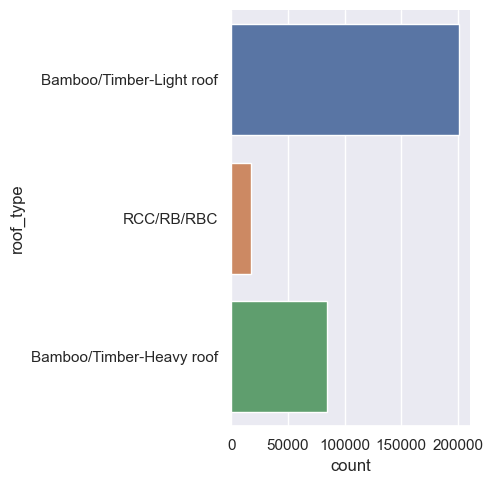

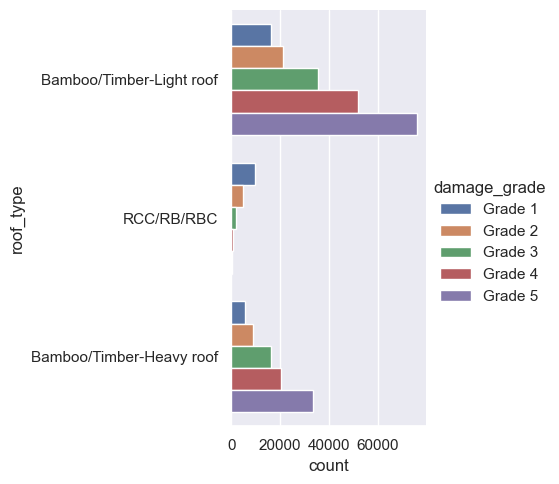

In [22]:
#bargraph for roof_type
print(eq_data_clean["roof_type"].value_counts())
sb.catplot(y = "roof_type", data = eq_data_clean, kind = "count")

#bargraph of roof_type against damage_grade
print(eq_data_clean[['damage_grade','roof_type']].groupby(['damage_grade','roof_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="roof_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

### Land Surface Condition
#### Bar graph

Flat              251506
Moderate slope     42283
Steep slope         9795
Name: land_surface_condition, dtype: int64
damage_grade  land_surface_condition
Grade 1       Flat                      27539
              Moderate slope             3155
              Steep slope                 714
Grade 2       Flat                      29120
              Moderate slope             4715
              Steep slope                 910
Grade 3       Flat                      44214
              Moderate slope             8176
              Steep slope                1851
Grade 4       Flat                      58945
              Moderate slope            11572
              Steep slope                2559
Grade 5       Flat                      91688
              Moderate slope            14665
              Steep slope                3761
dtype: int64


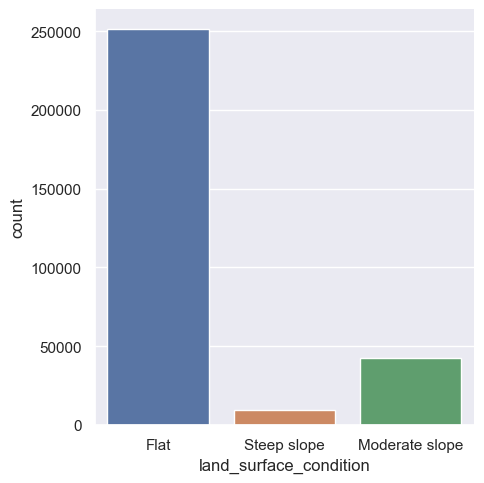

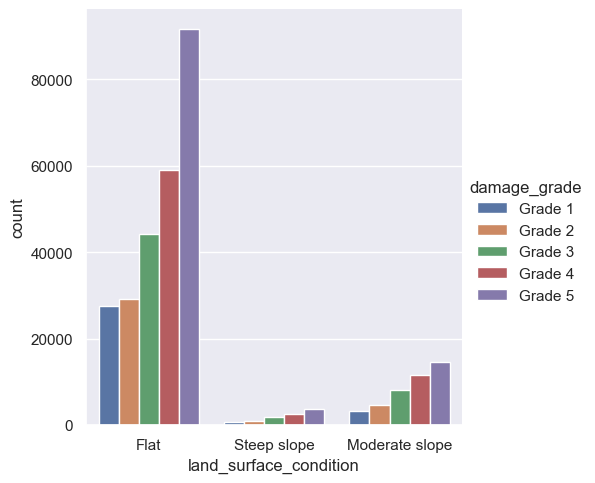

In [23]:
#bargraph for land_surface_condition
print(eq_data_clean["land_surface_condition"].value_counts())
sb.catplot(x = "land_surface_condition", data = eq_data_clean, kind = "count")

#bargraph of land_surface_condition against damage_grade
print(eq_data_clean[['damage_grade','land_surface_condition']].groupby(['damage_grade','land_surface_condition']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="land_surface_condition", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

### Superstructure Material Set
#### Bar graph

damage_grade  has_superstructure_adobe_mud
Grade 1       0                                30848
              1                                  560
Grade 2       0                                33315
              1                                 1430
Grade 3       0                                51076
              1                                 3165
Grade 4       0                                69219
              1                                 3857
Grade 5       0                               106363
              1                                 3751
dtype: int64
damage_grade  has_superstructure_other
Grade 1       0                            30512
              1                              896
Grade 2       0                            34337
              1                              408
Grade 3       0                            53523
              1                              718
Grade 4       0                            72287
              1                 

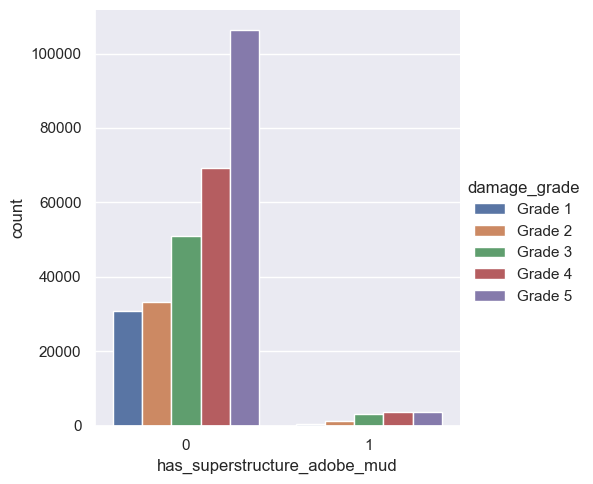

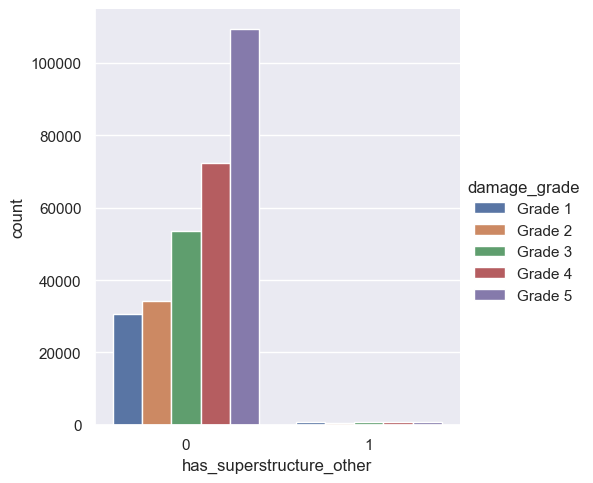

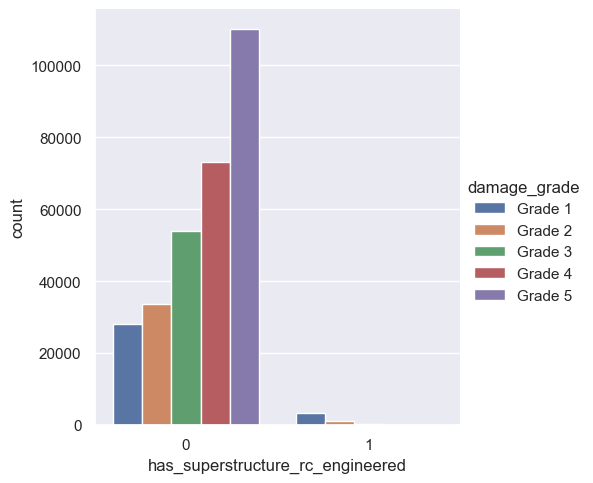

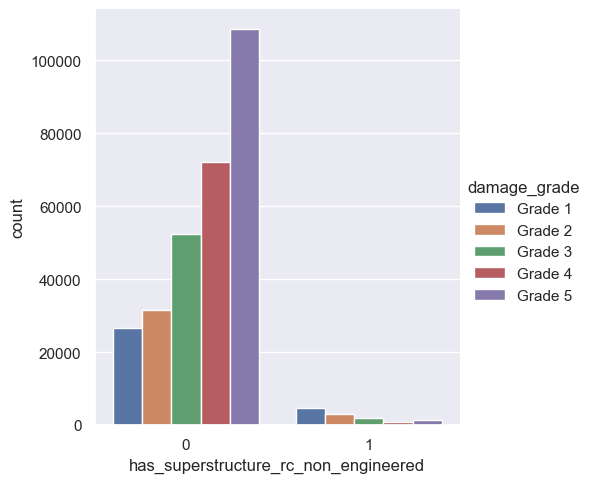

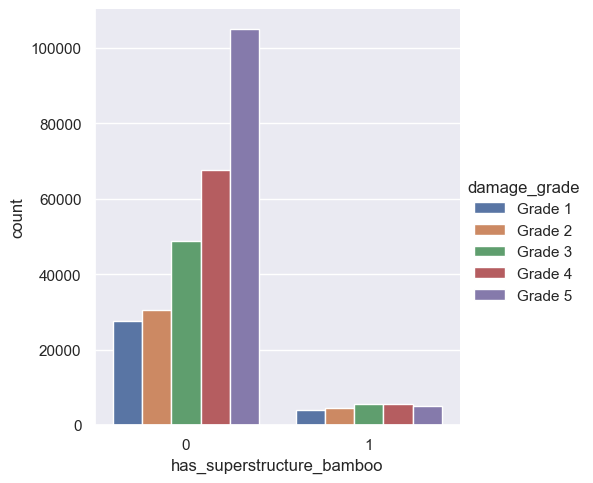

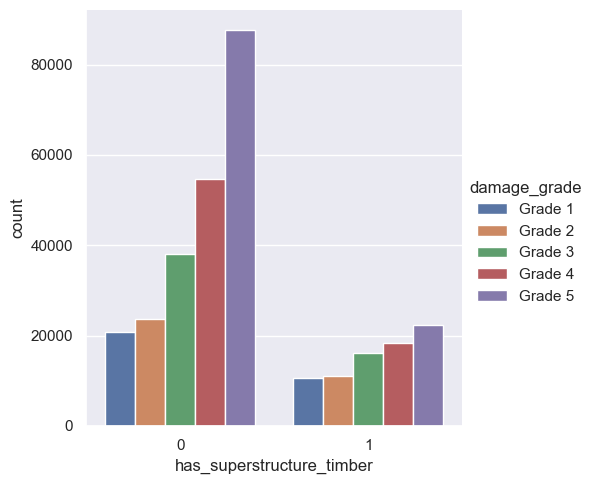

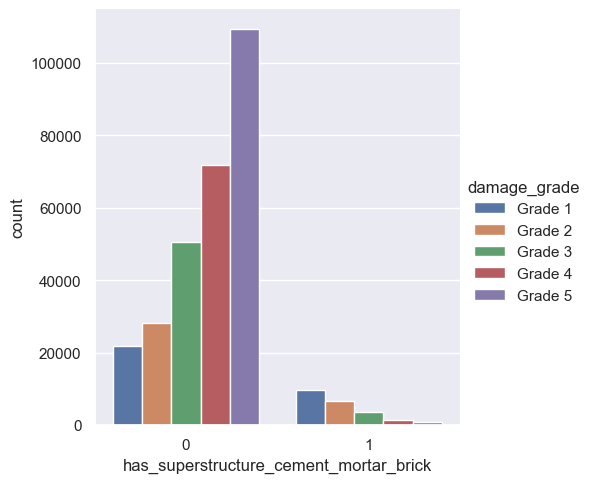

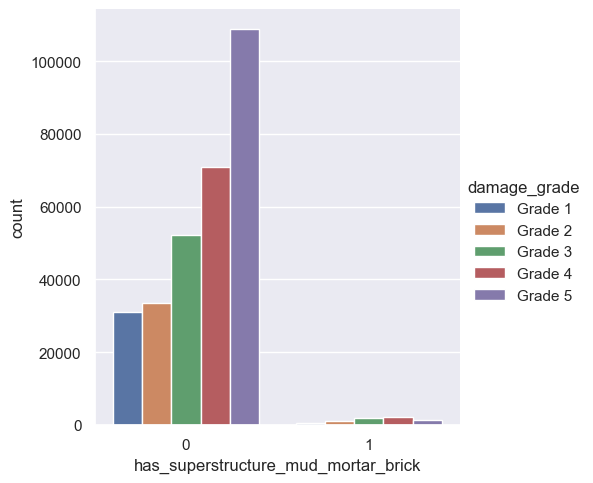

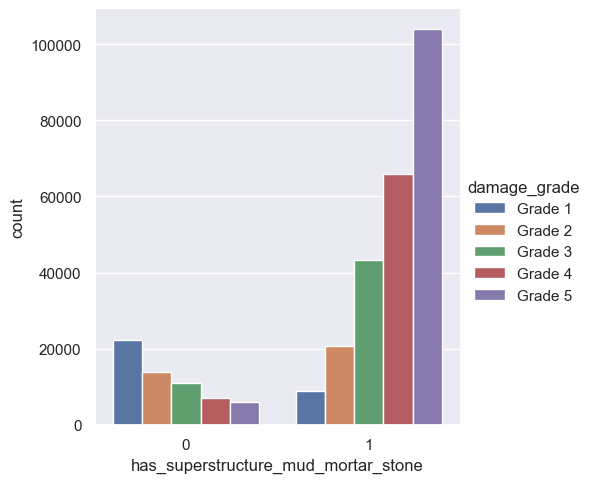

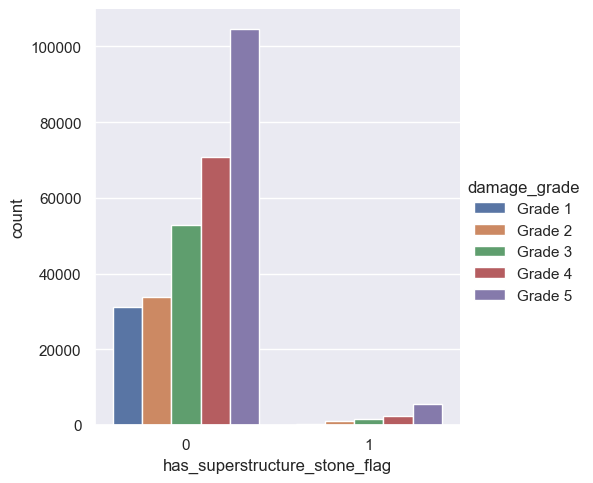

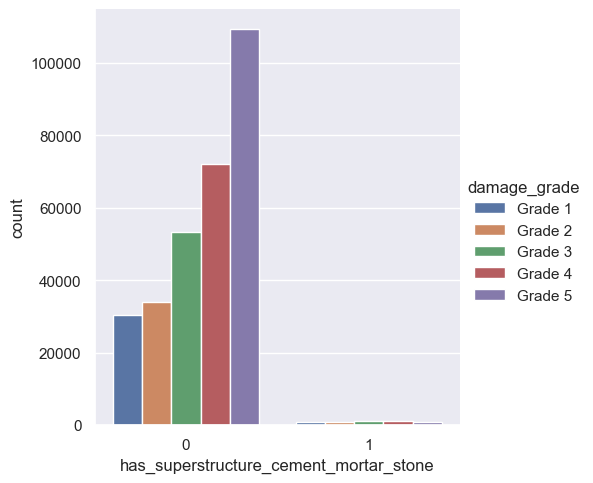

In [24]:
# 0 means No and 1 means Yes

#bargraph of has_superstructure_adobe_mud against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_adobe_mud']].groupby(['damage_grade','has_superstructure_adobe_mud']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_adobe_mud", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_other against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_other']].groupby(['damage_grade','has_superstructure_other']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_other", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_rc_engineered against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_rc_engineered']].groupby(['damage_grade','has_superstructure_rc_engineered']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_rc_engineered", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_rc_non_engineered against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_rc_non_engineered']].groupby(['damage_grade','has_superstructure_rc_non_engineered']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_rc_non_engineered", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_bamboo against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_bamboo']].groupby(['damage_grade','has_superstructure_bamboo']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_bamboo", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_timber against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_timber']].groupby(['damage_grade','has_superstructure_timber']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_timber", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_cement_mortar_brick against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_cement_mortar_brick']].groupby(['damage_grade','has_superstructure_cement_mortar_brick']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_cement_mortar_brick", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_mud_mortar_brick against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_mud_mortar_brick']].groupby(['damage_grade','has_superstructure_mud_mortar_brick']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_mud_mortar_brick", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_mud_mortar_stone against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_mud_mortar_stone']].groupby(['damage_grade','has_superstructure_mud_mortar_stone']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_mud_mortar_stone", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_stone_flag against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_stone_flag']].groupby(['damage_grade','has_superstructure_stone_flag']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_stone_flag", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_cement_mortar_stone against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_cement_mortar_stone']].groupby(['damage_grade','has_superstructure_cement_mortar_stone']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_cement_mortar_stone", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

<p style="line-height= 1.5"> Additionally, we will create new DataFrames (ie. 'damage_to_superstructure' and 'damage_to_type') that we will use in our next step for future comparisons. </p>

### damage_to_type
<p style="line-height= 1.5"> DataFrame storing the variables: 'foundation_type', 'ground_floor_type', 'other_floor_type', 'roof_type', 'land_surface_condition', and 'damage_grade'</p>


In [25]:
damage_to_type = pd.DataFrame(eq_data_clean[['foundation_type', 'ground_floor_type', 'other_floor_type', 'roof_type', 'land_surface_condition', 'damage_grade']])
damage_to_type.describe()

,foundation_type,ground_floor_type,other_floor_type,roof_type,land_surface_condition,damage_grade
count,303584,303584,303584,303584,303584,303584
unique,5,5,4,3,3,5
top,Mud mortar-Stone/Brick,Mud,TImber/Bamboo-Mud,Bamboo/Timber-Light roof,Flat,Grade 5
freq,250414,246184,193699,200893,251506,110114


### damage_to_superstructure
#### DataFrame storing the variables: 
<p style="line-height= 1.5">  'has_superstructure_adobe_mud', 'has_superstructure_other', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone' and 'damage_grade' </p>


In [26]:
damage_to_superstructure = pd.DataFrame(eq_data_clean[['has_superstructure_adobe_mud', 'has_superstructure_other', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'damage_grade']])
damage_to_superstructure.describe()

,has_superstructure_adobe_mud,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_bamboo,has_superstructure_timber,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone
count,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000
mean,0.042041,0.011868,0.016388,0.039356,0.080946,0.259190,0.071367,0.023005,0.800586,0.035226,0.015485
std,0.200683,0.108293,0.126961,0.194442,0.272753,0.438191,0.257438,0.149920,0.399561,0.184350,0.123472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Preparation for machine learning

<p style="line-height= 1.5"> Before we start putting our data into machine learning models, our group wants to look at the significance of each material in predicting the damage severity to a building.  Using correlation and heatmaps, we will find the strength of the relationship between the building materials, ‘age_building’ (predictor) and ‘damage_grade’ (response) </p>

### damage_to_type Heatmap

In [27]:
damage_grade = eq_data_clean.filter(items=['damage_grade'])

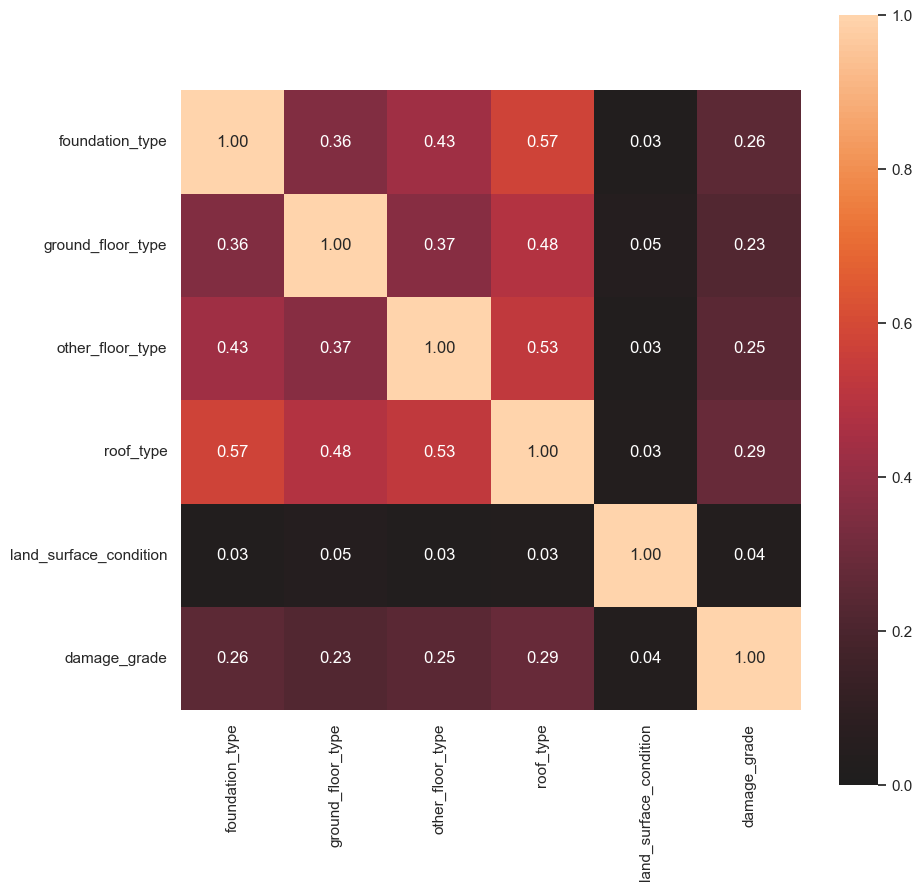

In [28]:
type_dmg_corr = associations(damage_to_type,figsize=(10,10))

### damage_to_superstructure Heatmap

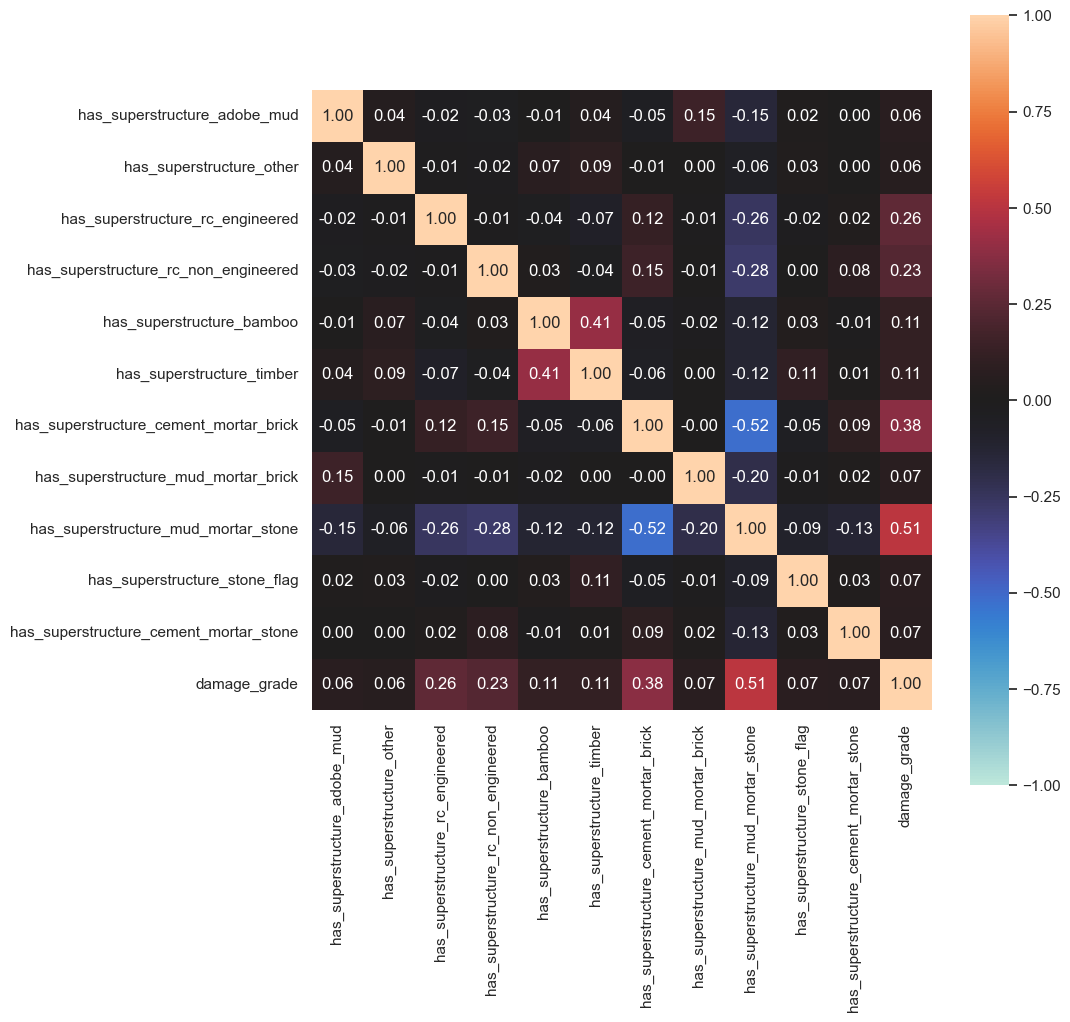

In [29]:
ss_dmg_corr = associations(damage_to_superstructure,figsize=(10,10))

### age_building and damage_grade Heatmap

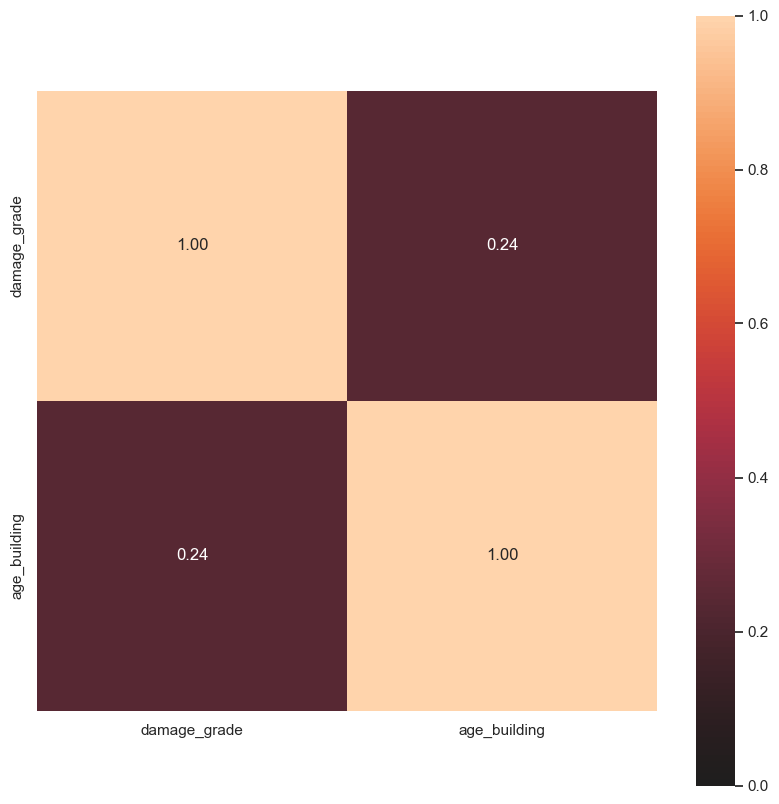

In [30]:
building_age = eq_data_clean.filter(items=['age_building'])
dmg_grade = eq_data_clean.filter(items=['damage_grade'])
damage_to_age = pd.concat([dmg_grade, building_age], axis=1)
dmg_age_corr = associations(damage_to_age,figsize=(10,10))

<p style="line-height= 1.5">  Upon looking at the correlations, some variables have extremely weak relationship with damage grade.  We decided to choose to investigate the variables with higher correlation to ‘damage_grade’ (ie. correlation that is >= 0.10) to use in our Machine Learning Models.Thus, we will not be using the variables with correlation &lt; 0.10 in our machine learning step. </p>



### We are interested in investigating further the following variables:
<ul>
    <li>age_building</li>
    <li>foundation_type</li>
    <li>ground_floor_type</li>
    <li>other_floor_type</li>
    <li>roof_type</li>
    <li>has_superstructure_rc_engineered</li>
    <li>has_superstructure_rc_non_engineered</li>
    <li>has_superstructure_bamboo</li>
    <li>has_superstructure_timber</li>
    <li>has_superstructure_cement_mortar_brick</li>
    <li>has_superstructure_mud_mortar_stone</li>
</ul>

### To handle our data easily, we have grouped some of the variables into two sets.

### Building Foundation set
<ul>
    <li>foundation_type</li>
    <li>roof_type</li>
    <li>ground_floor_type</li>
    <li>other_floor_type</li>
</ul>

### Superstructure Material set
<ul>
    <li>has_superstructure_rc_engineered</li>
    <li>has_superstructure_rc_non_engineered</li>
    <li>has_superstructure_bamboo</li>
    <li>has_superstructure_timber</li>
    <li>has_superstructure_cement_mortar_brick</li>
    <li>has_superstructure_mud_mortar_stone</li>
</ul>

<p style="line-height= 1.5">  Before we dive into the Machine Learning step, we need to use One-Hot Encoding.  Because most of our data are categorical, we decided to encode our categorical data into numerical data.  This allows us to perform more machine learning techniques on it. </p>

<p style="line-height= 1.5">  So, we encoded all variables except for 'damage_grade' and 'age_building'</p>


### One-Hot Encoding of categorical data

In [31]:
##Prepare response data
dmg_grade = eq_data_clean['damage_grade']
bldg_age = eq_data_clean['age_building']

foundation_type = eq_data_clean['foundation_type']
gf_type = eq_data_clean['ground_floor_type']
otherFloor = eq_data_clean['other_floor_type']
roof_type = eq_data_clean['roof_type']

ss_rc_eng = eq_data_clean['has_superstructure_rc_engineered']
ss_rc_non_eng = eq_data_clean['has_superstructure_rc_non_engineered']
ss_bamboo = eq_data_clean['has_superstructure_bamboo']
ss_timber = eq_data_clean['has_superstructure_timber']
ss_mmstone = eq_data_clean['has_superstructure_mud_mortar_stone']
ss_cmbrick = eq_data_clean['has_superstructure_cement_mortar_brick']

##one-hot encode the categorical data to be used as predictor variables for logistic regression 
foundation_type_encoded = pd.get_dummies(eq_data_clean['foundation_type'])
gf_type_encoded = pd.get_dummies(eq_data_clean['ground_floor_type'])
otherFloor_type_encoded = pd.get_dummies(eq_data_clean['other_floor_type'])
roof_type_encoded = pd.get_dummies(eq_data_clean['roof_type'])

ss_rc_eng_encoded = pd.get_dummies(eq_data_clean['has_superstructure_rc_engineered'])
ss_rc_non_eng_encoded = pd.get_dummies(eq_data_clean['has_superstructure_rc_non_engineered'])
ss_bamboo_encoded = pd.get_dummies(eq_data_clean['has_superstructure_bamboo'])
ss_timber_encoded = pd.get_dummies(eq_data_clean['has_superstructure_timber'])
ss_mmstone_encoded = pd.get_dummies(eq_data_clean['has_superstructure_mud_mortar_stone'])
ss_cmbrick_encoded = pd.get_dummies(eq_data_clean['has_superstructure_cement_mortar_brick'])

In [32]:
foundation_type_encoded.head()

,Bamboo/Timber,Cement-Stone/Brick,Mud mortar-Stone/Brick,Other,RC
408018,0,0,1,0,0
328683,0,0,1,0,0
303951,0,1,0,0,0
659708,0,0,1,0,0
718542,0,0,1,0,0


<p style="line-height= 1.5"> Our last step before going into Machine Learning step, we will be using Chi Square method to find out the importance of each variable in order of how it influences the response. It checks if the variables have a strong relationship with each other. The chi value tells you the importance of each variable with respect to the other variables. The higher the chi value, the more important the variable is.</p>

### Building Foundation Set's and Building Age Chi-Square value

<AxesSubplot:>

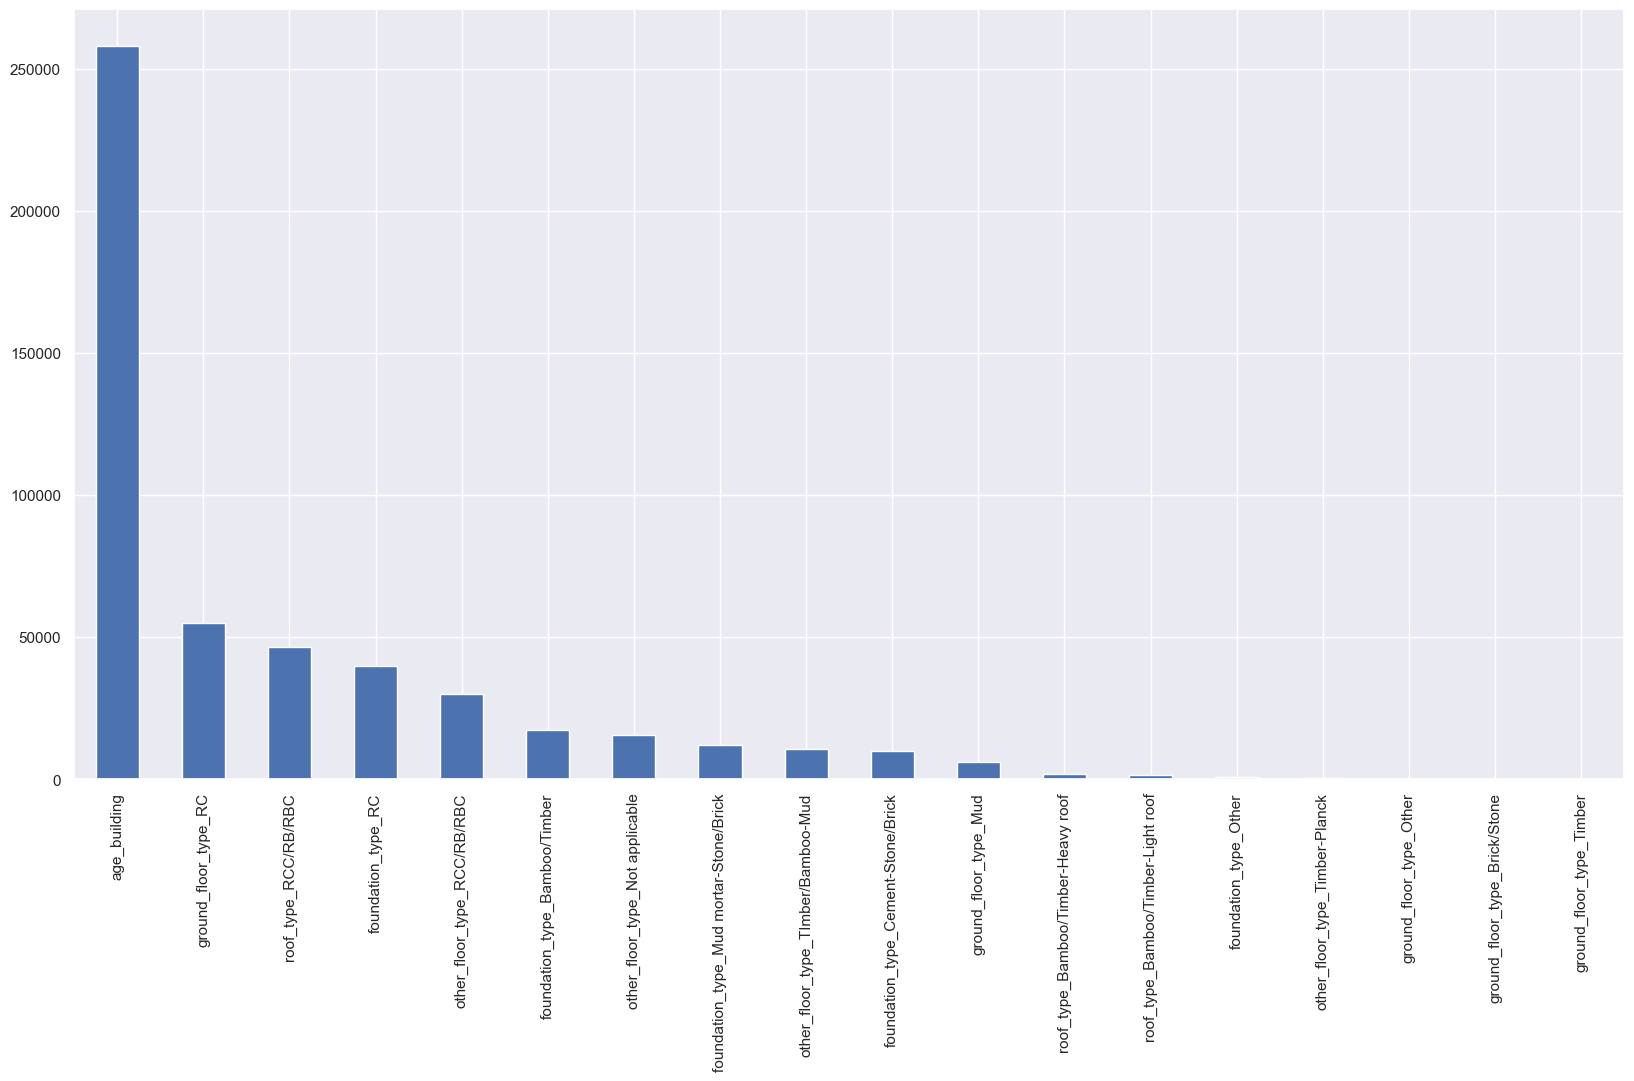

In [33]:
merge = pd.concat([bldg_age, foundation_type, gf_type, otherFloor, roof_type], axis = 1)
merge_encode = pd.get_dummies(data=merge)
chi_scores = chi2(merge_encode, dmg_grade)
#the higher the chi value, the higher the importance
chi_values = pd.Series(chi_scores[0], index=merge_encode.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar(figsize=(20,10))

### Superstructure Material Set's Chi-Square value

<AxesSubplot:>

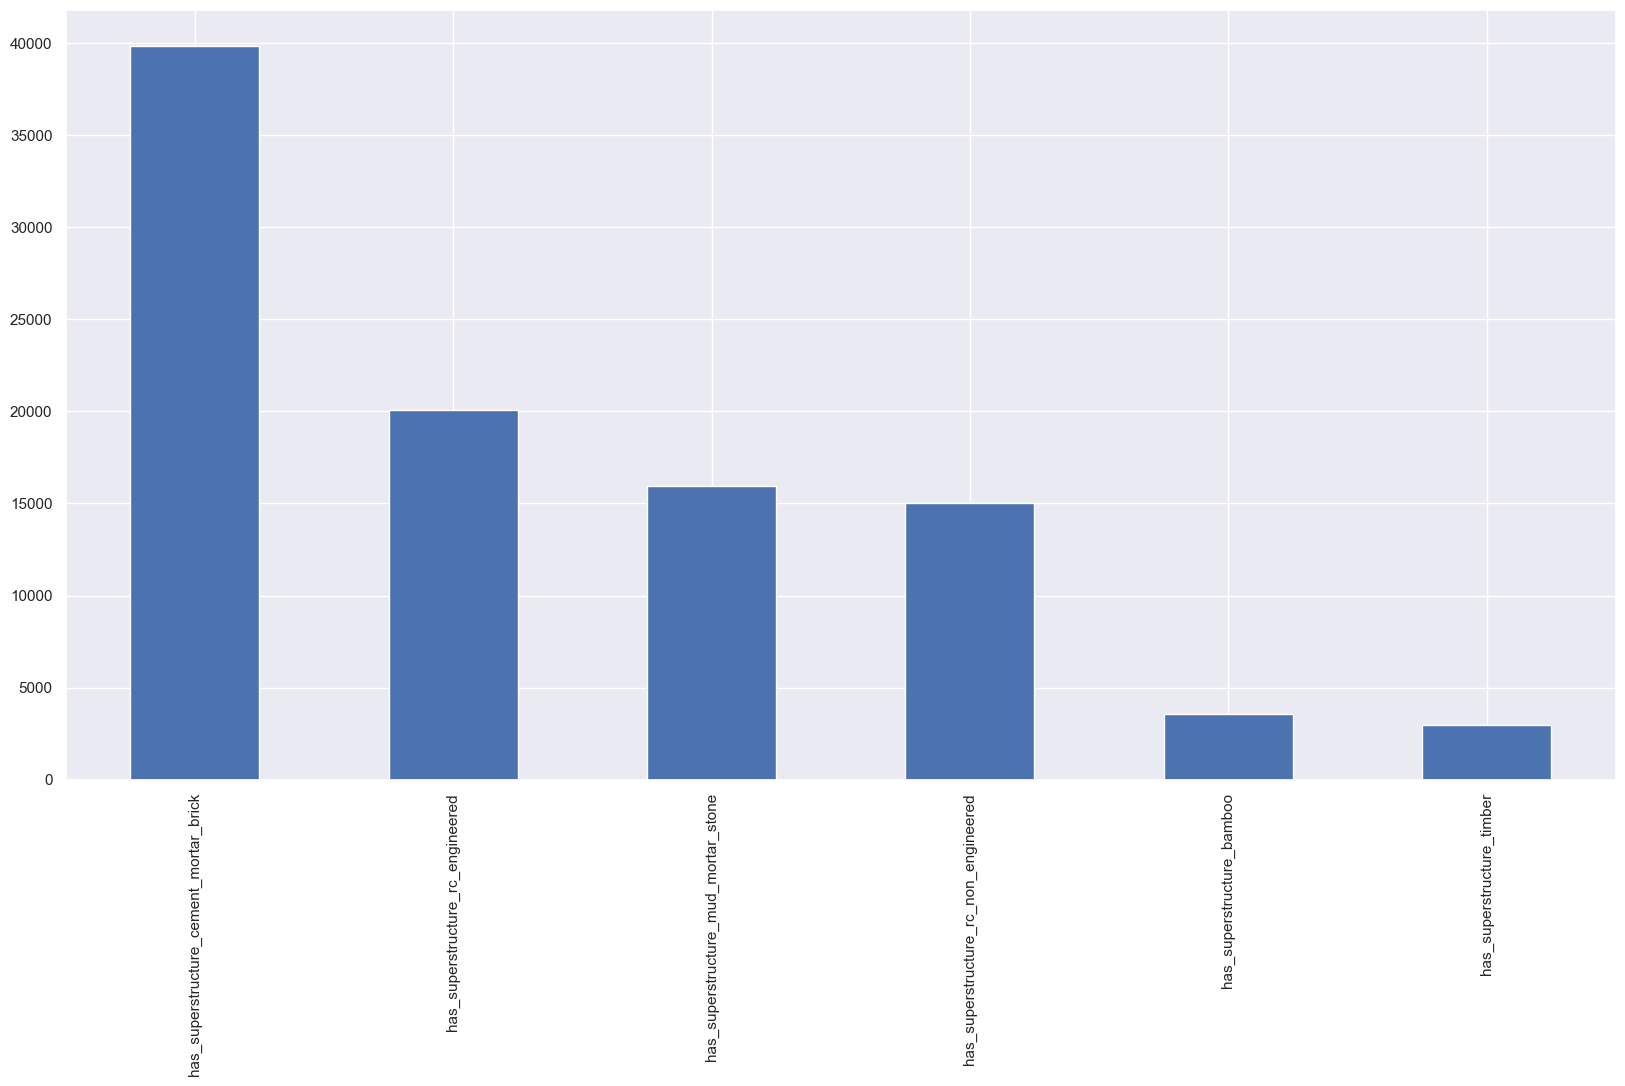

In [34]:
merge = pd.concat([ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
merge_encode = pd.get_dummies(data=merge)
chi_scores = chi2(merge_encode, dmg_grade)

chi_values = pd.Series(chi_scores[0], index=merge_encode.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar(figsize=(20,10))

# 4. Machine Learning

<p style="line-height= 1.5"> Our group has decided to use Logistic Regression and Random Forest Machine Learning Models to help us analyse and find our problem statement answers.</p>

<p style="line-height= 1.5"> By using a Logistric Regression Model, it helps us confirm their relationship with damage grade and understand how strong their relationship is. We will be using precision, recall, F1 score under the classification report and the accuracy score as our performance metrics. </p>

<ol>
    <li>Precision refers to the percentage of correct positive predictions relative to the total positive predictions.</li>
    <li>Recall is essentially the ratio of true positives to all the positives in ground truth.</li>
    <li>F1 score means weighted harmonic mean of precision and recall. The closer to 1, the better the model.</li>
    <li>Accuracy is defined as the number of correct predictions divided by the total number of predictions, multiplied by 100.</li>
</ol>
    
<p style="line-height= 1.5"> So, how will we use the metrics during experimentation phases of this step? First, we will use Precision and Recall metrics to measure each variable's ability to predict the different damage grades. In addition, it will help us to identify a variable's relationship with each damage grade. By doing so, we will be able to spot the fallacies when making our conclusive findings. Secondly, Accuracy will be used solely as a measure of reliability in each variables prediction of damage grade. Lastly, we will use F1 score to determine the overall effectiveness of the model to measure damage grade.</p>

<p style="line-height= 1.5">To start off, we will look at the building age, followed by the superstructure material set's variables and subsequently the building foundation set's variables.</p>

## Logistic Regression

### Building Age

In [35]:
age_building_encoded = pd.get_dummies(eq_data_clean['age_building'])
train_pred, test_pred, train_resp, test_resp = train_test_split(age_building_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()
warnings.simplefilter("ignore")
logReg.fit(train_pred, train_resp)
print("Age Building Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Age Building Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.37
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.35      0.21      0.26      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.24      0.00      0.00     16352
     Grade 4       0.37      0.01      0.01     22000
     Grade 5       0.37      0.95      0.53     32736

    accuracy                           0.37     91076
   macro avg       0.26      0.23      0.16     91076
weighted avg       0.30      0.37      0.22     91076



## Superstructure Material Set

### Superstructure - Bamboo

In [36]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_bamboo_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Bamboo Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Bamboo Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.36
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.00      0.00      0.00      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.24      0.08      0.12     22000
     Grade 5       0.37      0.95      0.54     32736

    accuracy                           0.36     91076
   macro avg       0.12      0.21      0.13     91076
weighted avg       0.19      0.36      0.22     91076



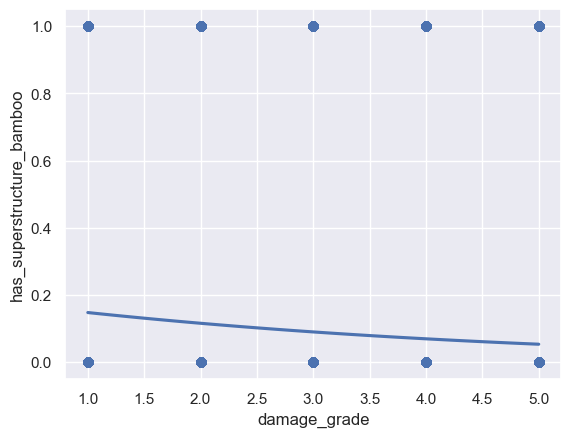

In [37]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_bamboo = eq_data_clean['has_superstructure_bamboo']
merge = pd.concat([ss_bamboo, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_bamboo, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

###  Superstructure - RC engineered

In [38]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_rc_eng_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("RC Engineered Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

RC Engineered Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.38
Accuracy on the test set: 0.37
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.69      0.11      0.19      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.37      1.00      0.54     32736

    accuracy                           0.37     91076
   macro avg       0.21      0.22      0.15     91076
weighted avg       0.20      0.37      0.21     91076



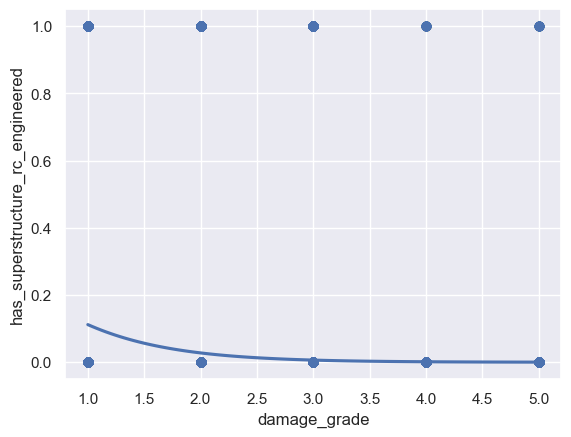

In [39]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_rc_eng = eq_data_clean['has_superstructure_rc_engineered']
merge = pd.concat([ss_rc_eng, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_rc_eng, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - RC non engineered

In [40]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_rc_non_eng_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("RC Non Engineered Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

RC Non Engineered Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.37
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.39      0.14      0.21      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.37      0.99      0.54     32736

    accuracy                           0.37     91076
   macro avg       0.15      0.23      0.15     91076
weighted avg       0.17      0.37      0.22     91076



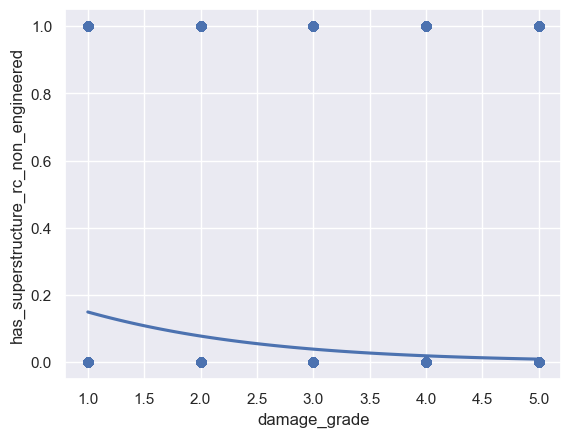

In [41]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_rc_non_eng = eq_data_clean['has_superstructure_rc_non_engineered']
merge = pd.concat([ss_rc_non_eng, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_rc_non_eng, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Timber

In [42]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_timber_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Timber Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Timber Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.36
Accuracy on the test set: 0.36
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.00      0.00      0.00      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.36      1.00      0.53     32736

    accuracy                           0.36     91076
   macro avg       0.07      0.20      0.11     91076
weighted avg       0.13      0.36      0.19     91076



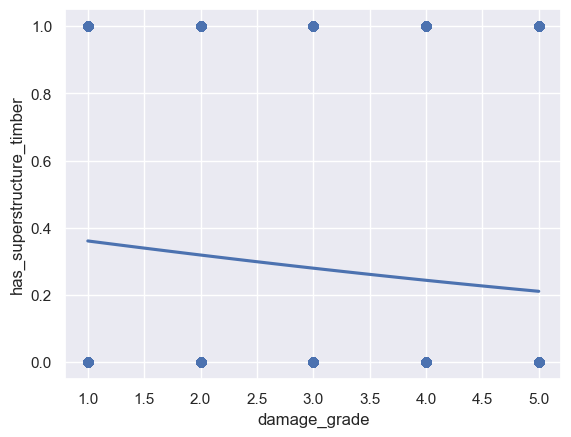

In [43]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_timber = eq_data_clean['has_superstructure_timber']
merge = pd.concat([ss_timber, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_timber, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Mud-Mortar Stone Brick

In [44]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_mmstone_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Mud-Mortar Stone Bricks Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Mud-Mortar Stone Bricks Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.42
Accuracy on the test set: 0.41
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.37      0.72      0.49      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.43      0.95      0.59     32736

    accuracy                           0.41     91076
   macro avg       0.16      0.33      0.22     91076
weighted avg       0.19      0.41      0.26     91076



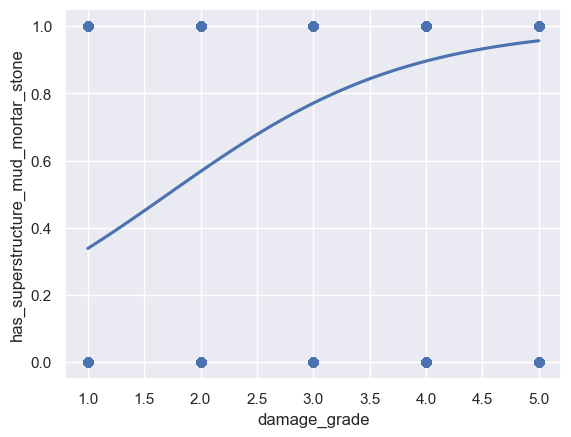

In [45]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_mud_mortar_stone = eq_data_clean['has_superstructure_mud_mortar_stone']
merge = pd.concat([ss_mud_mortar_stone, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_mud_mortar_stone, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Cement-Mortar Stone Brick

In [46]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_cmbrick_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Cement-Mortar Stone Bricks Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Cement-Mortar Stone Bricks Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.39
Accuracy on the test set: 0.39
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.45      0.31      0.37      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.39      0.99      0.56     32736

    accuracy                           0.39     91076
   macro avg       0.17      0.26      0.18     91076
weighted avg       0.19      0.39      0.24     91076



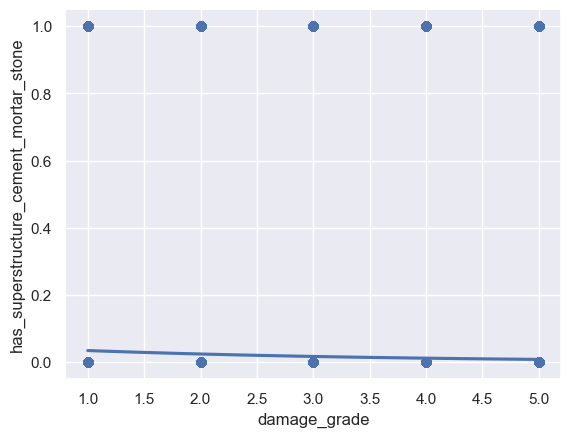

In [47]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_cement_mortar_stone = eq_data_clean['has_superstructure_cement_mortar_stone']
merge = pd.concat([ss_cement_mortar_stone, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_cement_mortar_stone, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

## Building Foundation Set

### Foundation Type

In [48]:
train_pred, test_pred, train_resp, test_resp = train_test_split(foundation_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Foundation Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Foundation Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.41
Accuracy on the test set: 0.41
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.38      0.61      0.47      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.41      0.96      0.58     32736

    accuracy                           0.41     91076
   macro avg       0.16      0.31      0.21     91076
weighted avg       0.19      0.41      0.26     91076



### Ground Floor Type

In [49]:
train_pred, test_pred, train_resp, test_resp = train_test_split(gf_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Ground Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Ground Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.40
Accuracy on the test set: 0.40
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.46      0.44      0.45      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.39      0.99      0.56     32736

    accuracy                           0.40     91076
   macro avg       0.17      0.29      0.20     91076
weighted avg       0.19      0.40      0.25     91076



### Other Floor Type

In [50]:
warnings.simplefilter("ignore")
train_pred, test_pred, train_resp, test_resp = train_test_split(roof_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Other Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Other Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.39
Accuracy on the test set: 0.39
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.55      0.31      0.40      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.38      1.00      0.55     32736

    accuracy                           0.39     91076
   macro avg       0.19      0.26      0.19     91076
weighted avg       0.19      0.39      0.24     91076



### Roof Type

In [51]:
warnings.simplefilter("ignore")
train_pred, test_pred, train_resp, test_resp = train_test_split(otherFloor_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Roof Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,resp_predictor))

Roof Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.38
Accuracy on the test set: 0.38
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.52      0.22      0.31      9509
     Grade 2       0.00      0.00      0.00     10479
     Grade 3       0.00      0.00      0.00     16352
     Grade 4       0.00      0.00      0.00     22000
     Grade 5       0.37      1.00      0.54     32736

    accuracy                           0.38     91076
   macro avg       0.18      0.24      0.17     91076
weighted avg       0.19      0.38      0.23     91076



## Random Forest

<p style="line-height= 1.5"> Now, we will use Random Forest to check the use and accuracy of the values to predict damage grade. As seen, our logistic regression generated weak predictions. Hence, we have decided to use Random Forest to aid us in getting a more accurate and reliable prediction that can be used to make conclusive findings. Furthermore, some superstructure variables have a higher level of importance than the remaining variables. So we will be looking out for them when analysing the popular choice made by Random Forest. We will conduct the same steps and analysis process with the Building Foundation Set's variables against damage grade. </p>

<p style="line-height= 1.5"> We will be generating two models of Random Forest. The first Random Forest will use the variables of Superstructure material Set. The data in this set are categorical data of binary classification and will be used as the input. For the second Random Forest will use the variables of Building Foundation Set. The data in this set are categorical data which have been one-hot encoded into a binary classification and will be used as the input. Both Random Forest models will each generate ten trees of which the most popular choice among the ten trees will be the output of the Random Forest Model. </p>


<p style="line-height= 1.5"> Our baseline for our analysis will be the results generated by the Logistic Regression Model. As mentioned in our README file, the Machine Learning Models we can utilize are limited since our input data are mostly categorical in nature and are either binary classification or one-hot encoded.</p>

## Superstructure Material Set

In [55]:
merge = pd.concat([ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()

rf.fit(train_pred, train_resp)
predictor = rf.predict(train_pred)
accuracy = accuracy_score(train_resp, predictor)
print('Accuracy of Random Forest on train set: {:.2f}'.format(accuracy))
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Random Forest on test set: {:.2f}'.format(accuracy))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,predictor))

Accuracy of Random Forest on train set: 0.43
Accuracy of Random Forest on test set: 0.42
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.44      0.68      0.53      9509
     Grade 2       0.21      0.00      0.00     10479
     Grade 3       0.34      0.01      0.02     16352
     Grade 4       0.28      0.05      0.09     22000
     Grade 5       0.43      0.94      0.59     32736

    accuracy                           0.42     91076
   macro avg       0.34      0.34      0.25     91076
weighted avg       0.35      0.42      0.29     91076



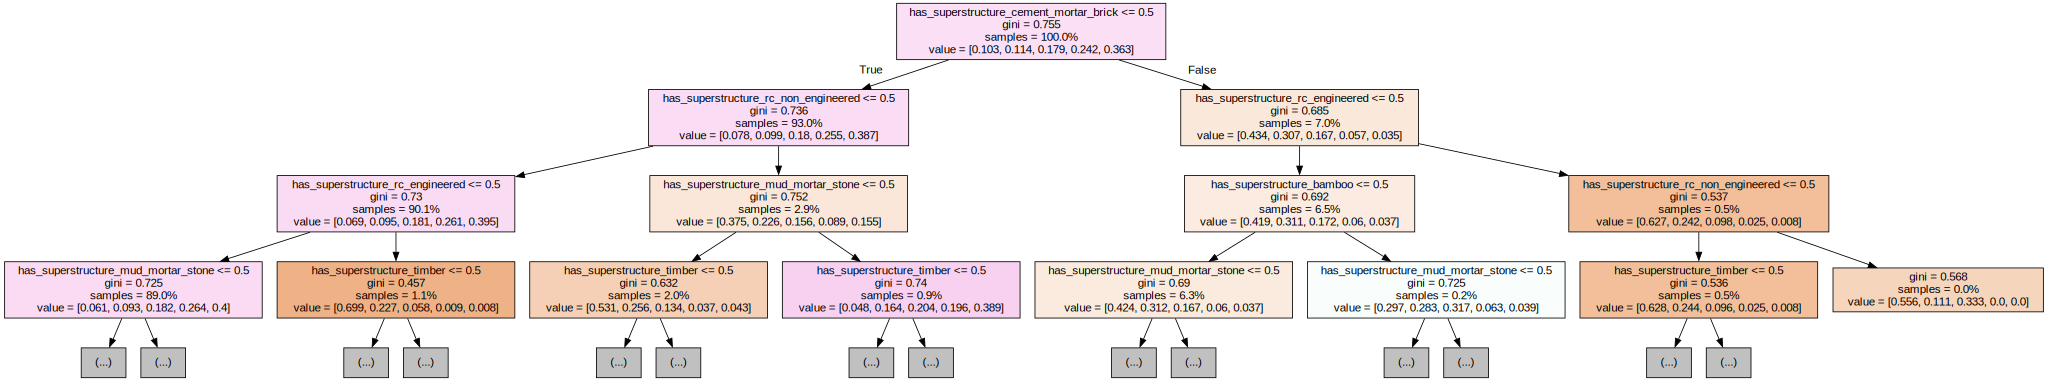

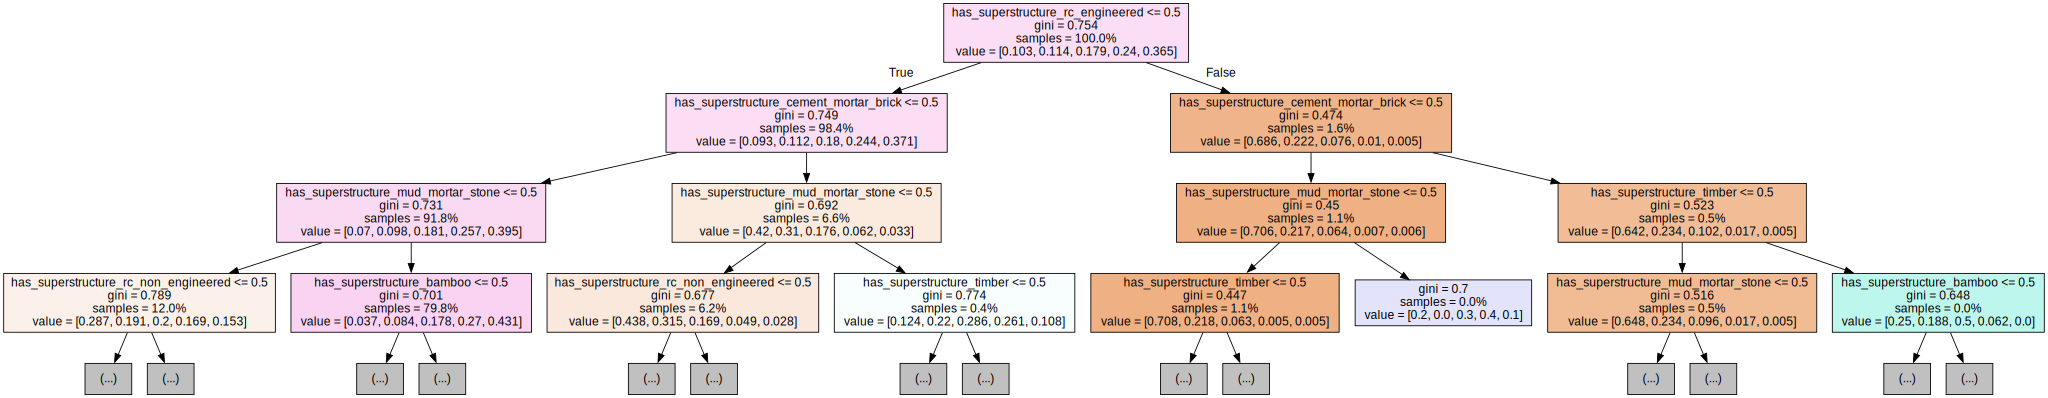

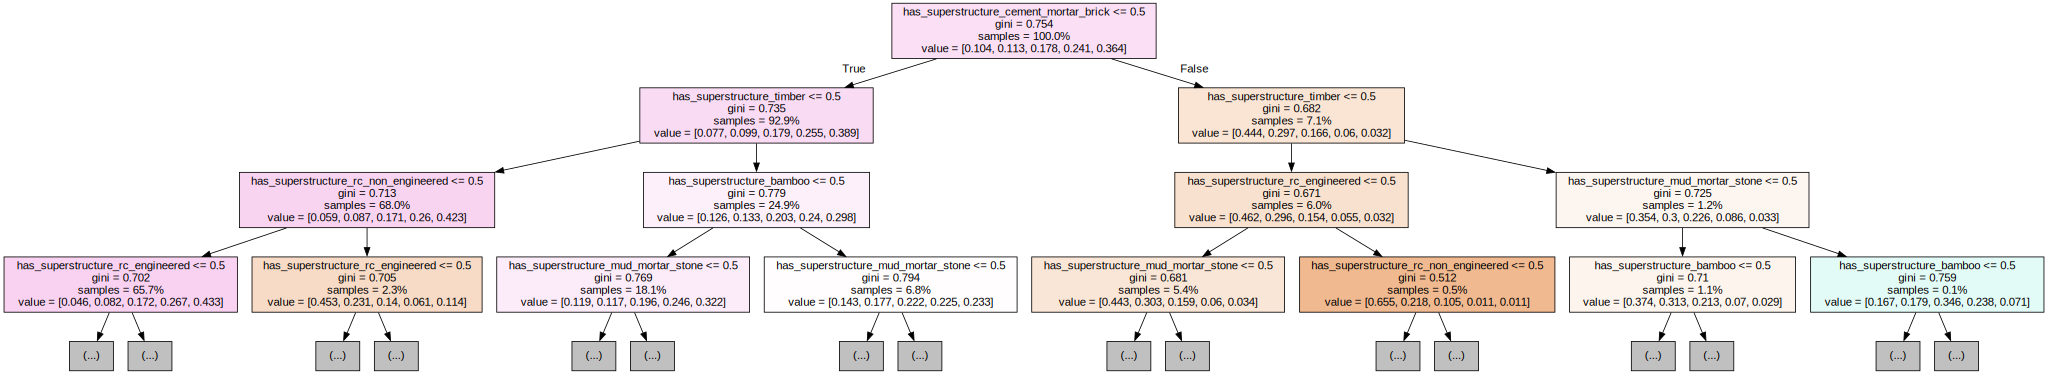

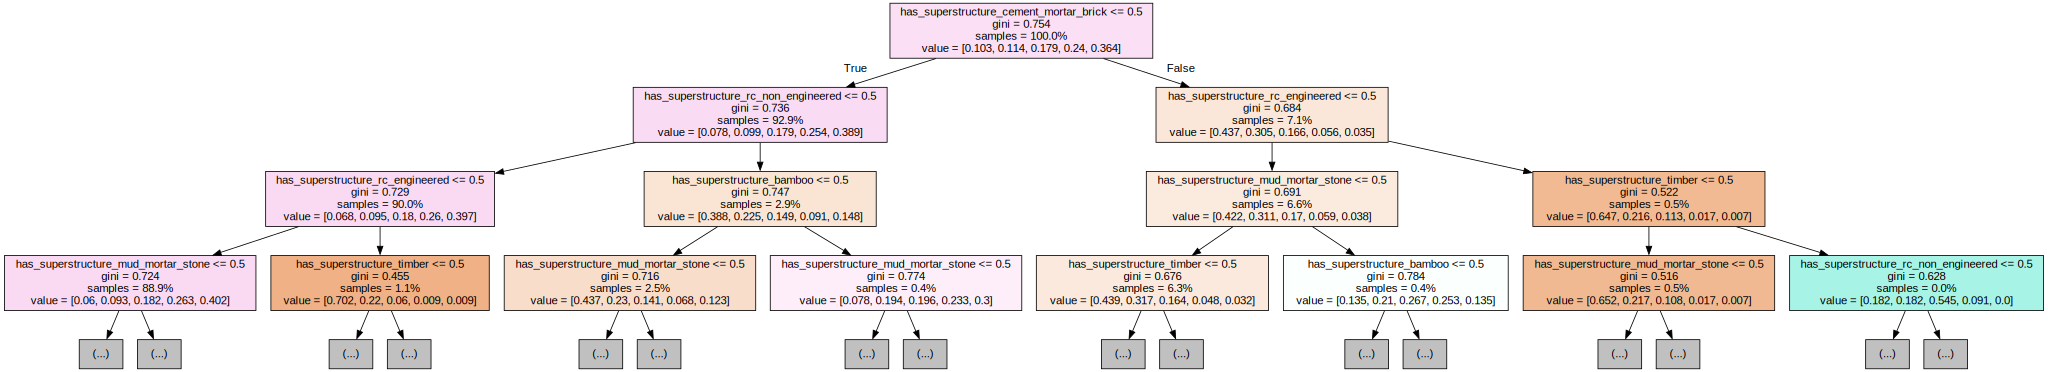

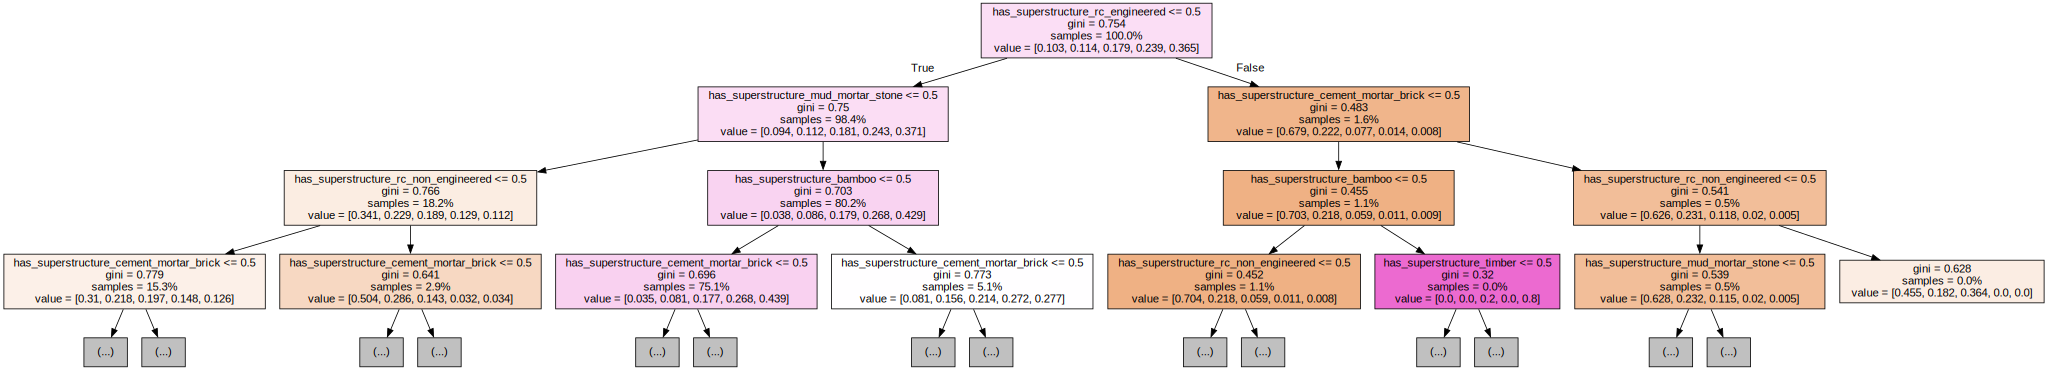

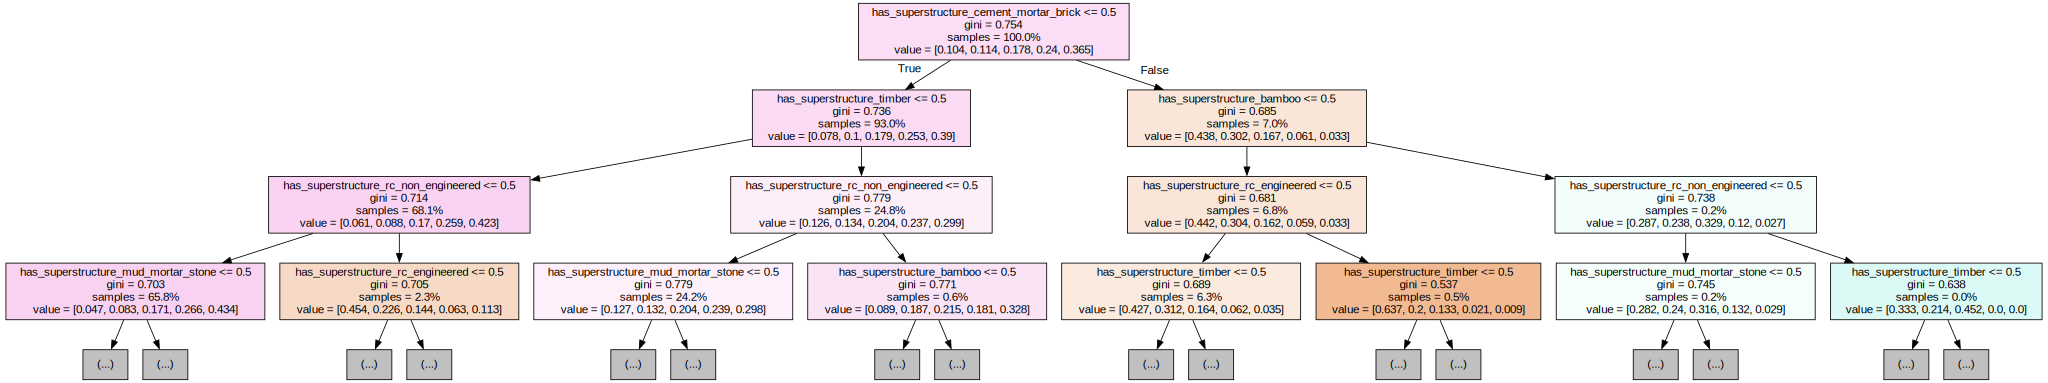

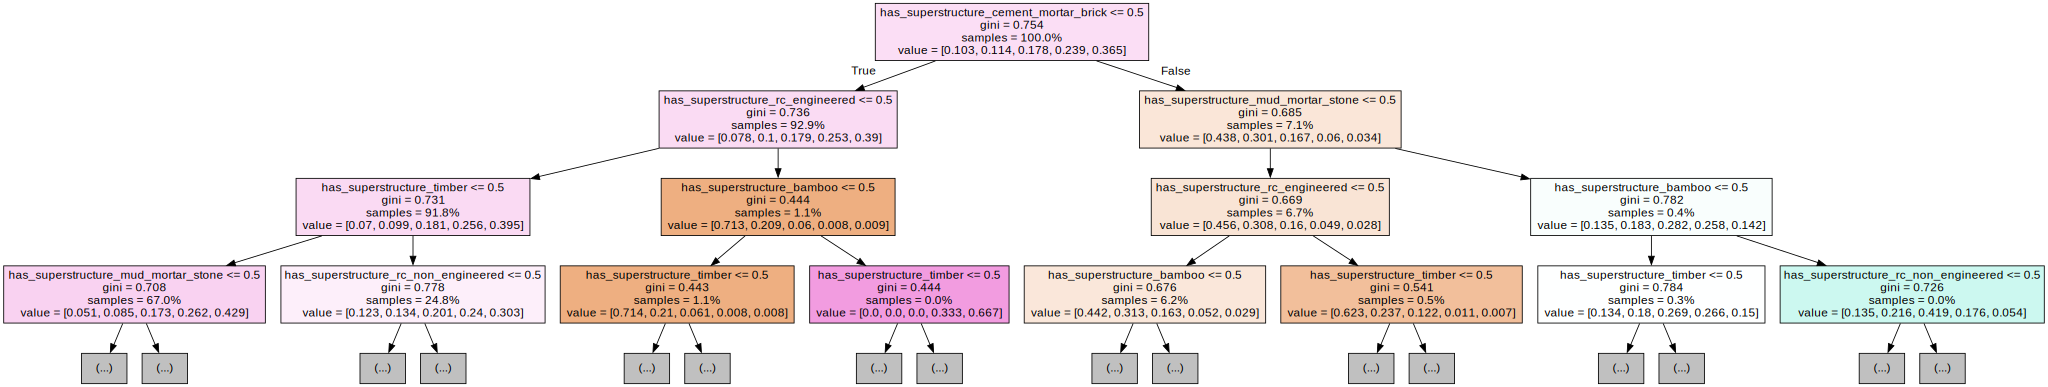

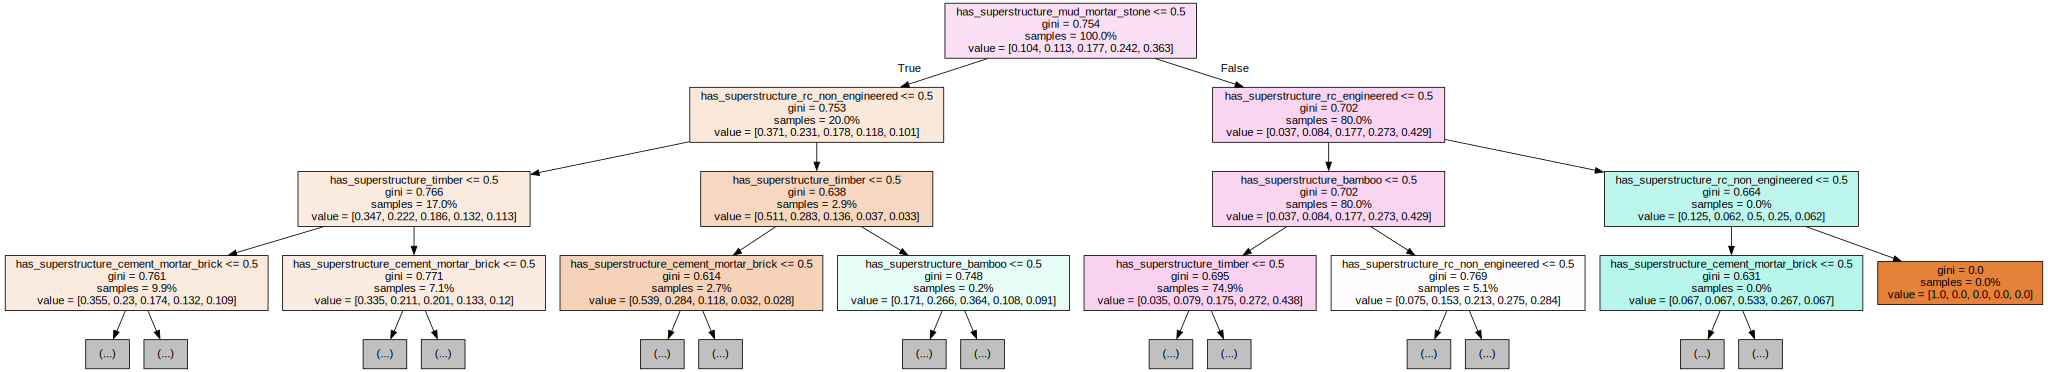

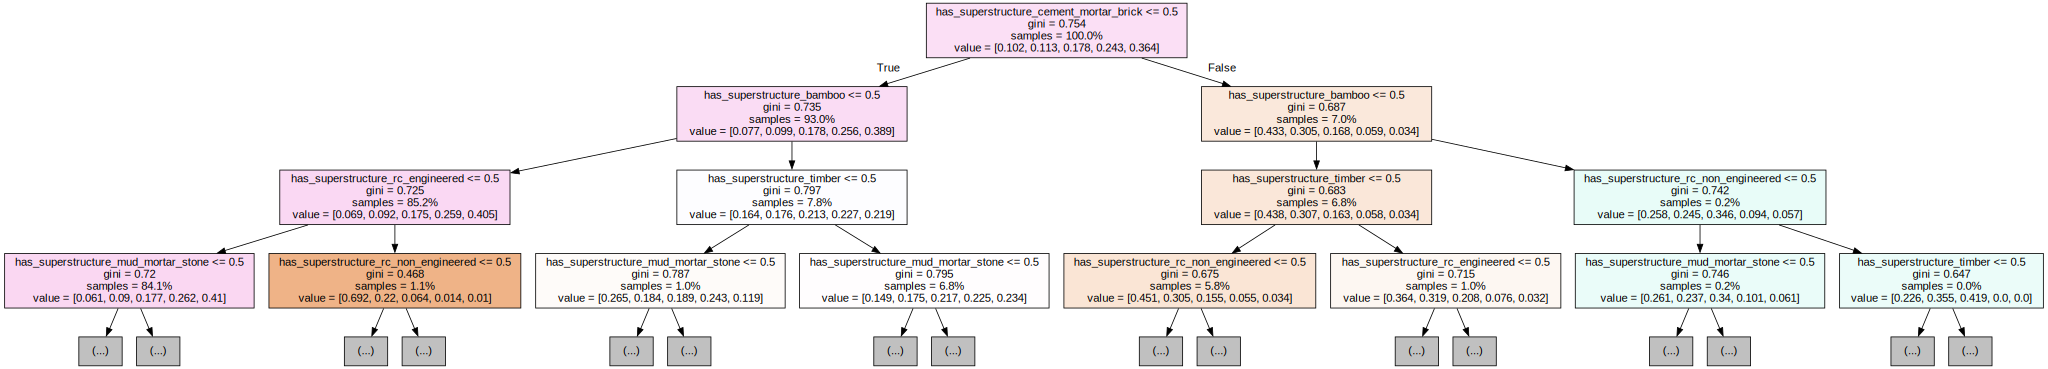

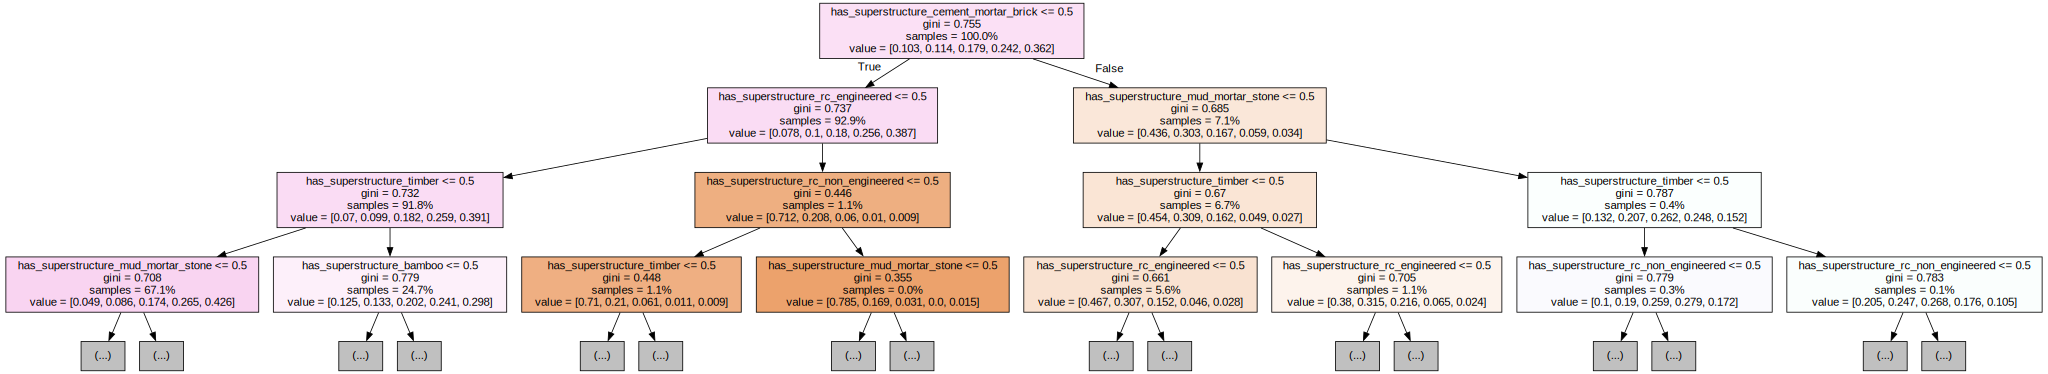

<Figure size 3000x3000 with 0 Axes>

In [56]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<p style="line-height= 1.5"> From these 10 Random Forest trees, the most popular choice was the Cement-Mortar Brick. Secondly most popular was Reinforced Concrete (RC) Non Engineered. Lastly, the superstructure Timber was the runner up to the first two choices. </p>

<p style="line-height= 1.5"> We can infer from these choices that the use of Cement-Mortar Brick and RC Non Engineered for superstructure are the main contributors in determining the expected damage grade of a building. Meanwhile, Timber is a mild contributor to damage grade. The surprising fact is that RC Non Engineered and Timber did not have a high Chi Square value, as seen above, yet it was a somewhat popular choice by the Random Forest model.</p>


# Building's Foundation Set

In [57]:
merge = pd.concat([foundation_type_encoded, gf_type_encoded, otherFloor_type_encoded, roof_type_encoded], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()

rf.fit(train_pred, train_resp)
predictor = rf.predict(train_pred)
accuracy = accuracy_score(train_resp, predictor)
print('Accuracy of Random Forest on train set: {:.2f}'.format(accuracy))
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Random Forest on test set: {:.2f}'.format(accuracy))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,predictor))

Accuracy of Random Forest on train set: 0.43
Accuracy of Random Forest on test set: 0.42
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.49      0.57      0.53      9509
     Grade 2       0.31      0.02      0.04     10479
     Grade 3       0.27      0.07      0.11     16352
     Grade 4       0.27      0.01      0.02     22000
     Grade 5       0.42      0.96      0.59     32736

    accuracy                           0.42     91076
   macro avg       0.35      0.33      0.26     91076
weighted avg       0.35      0.42      0.30     91076



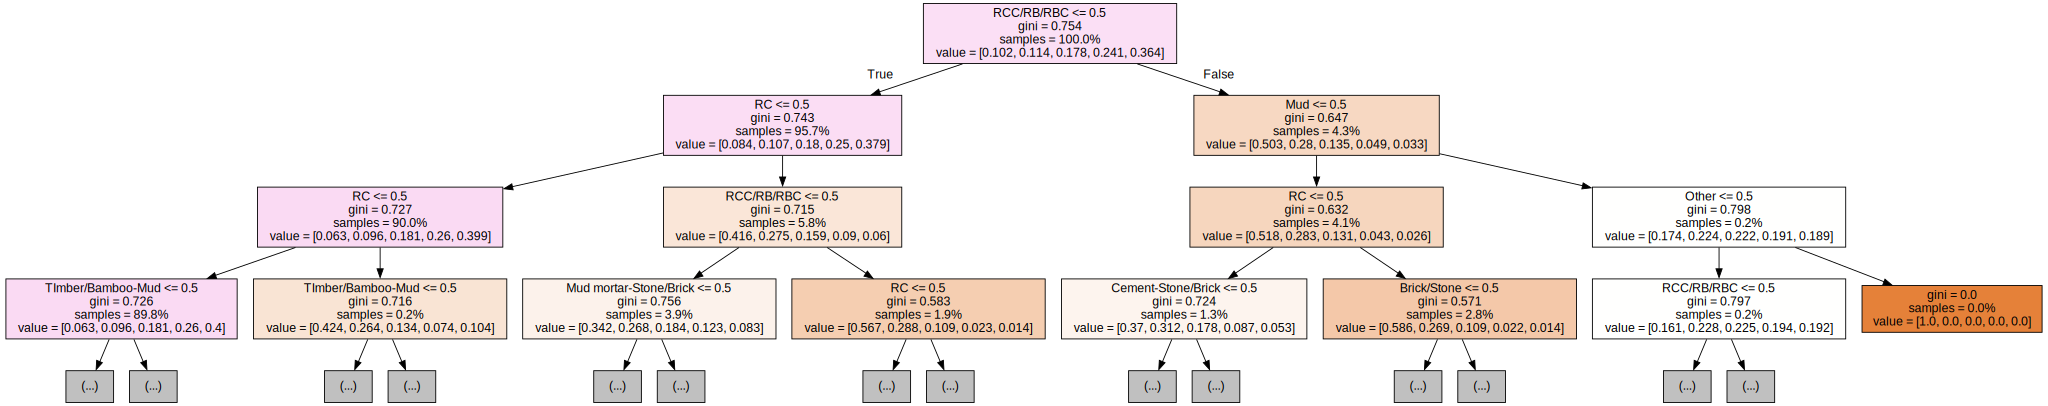

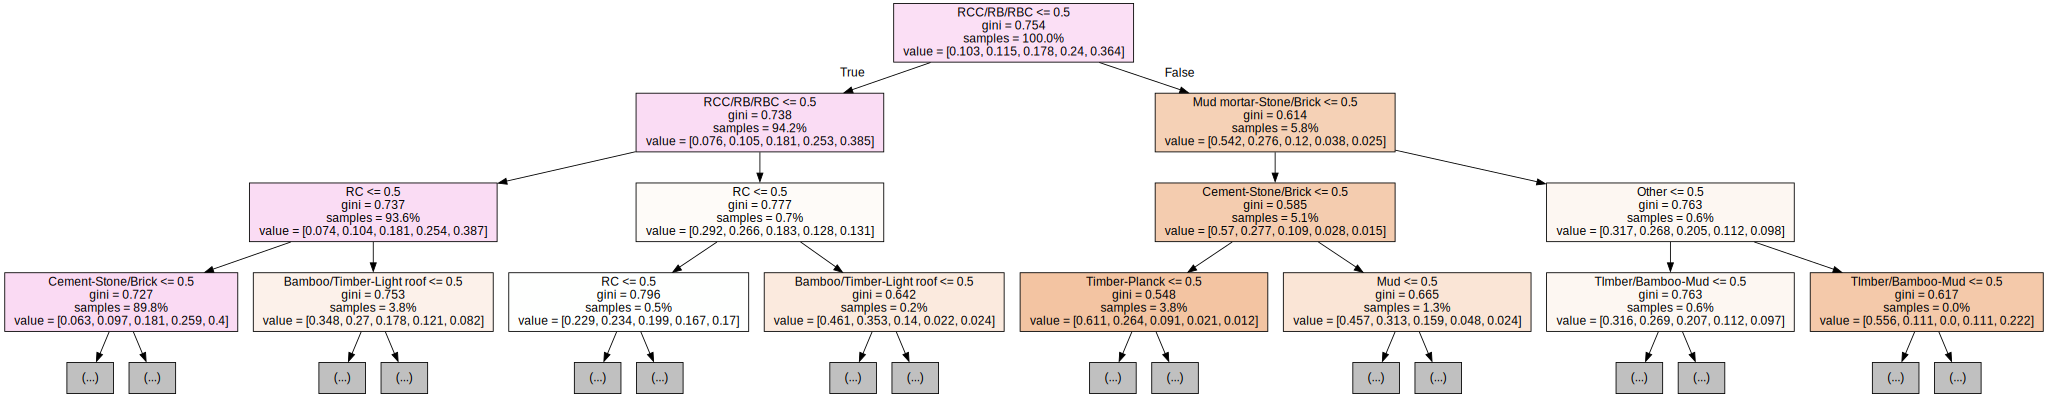

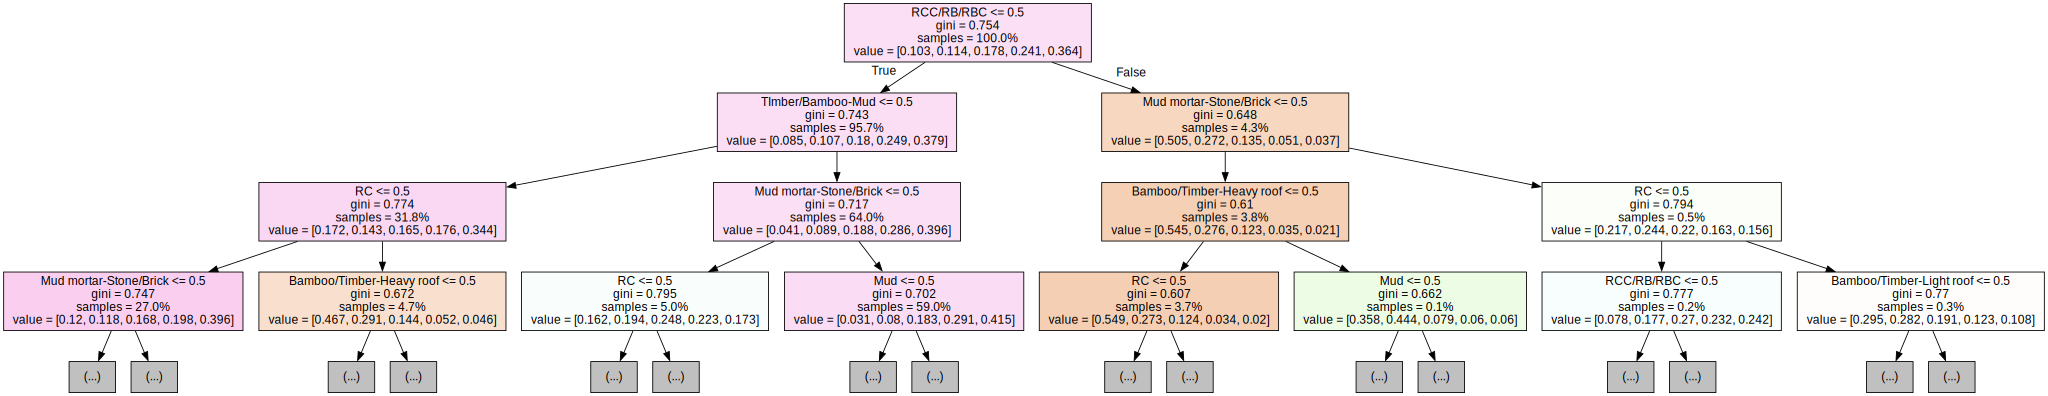

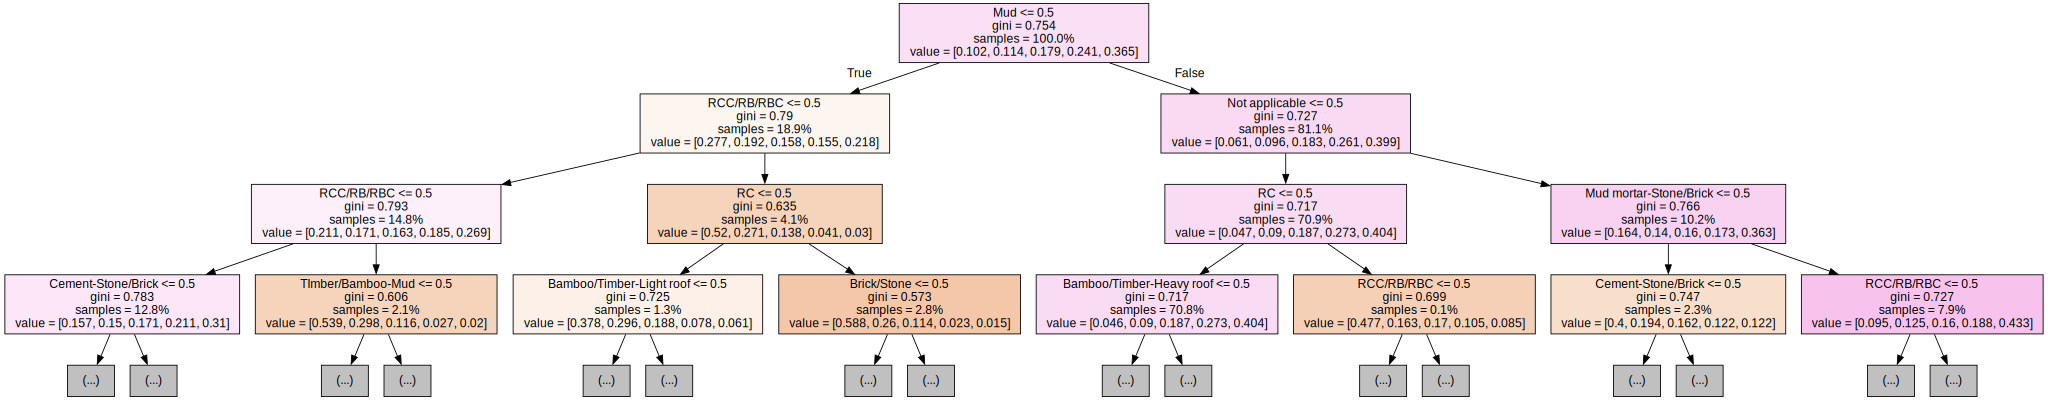

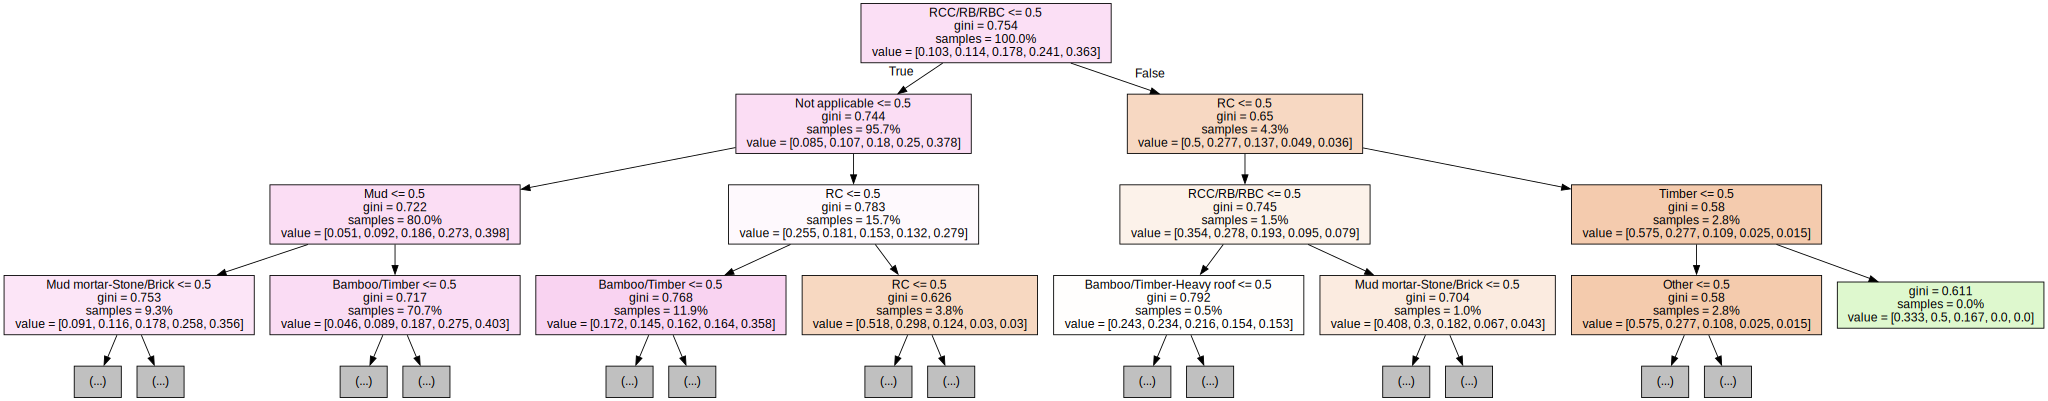

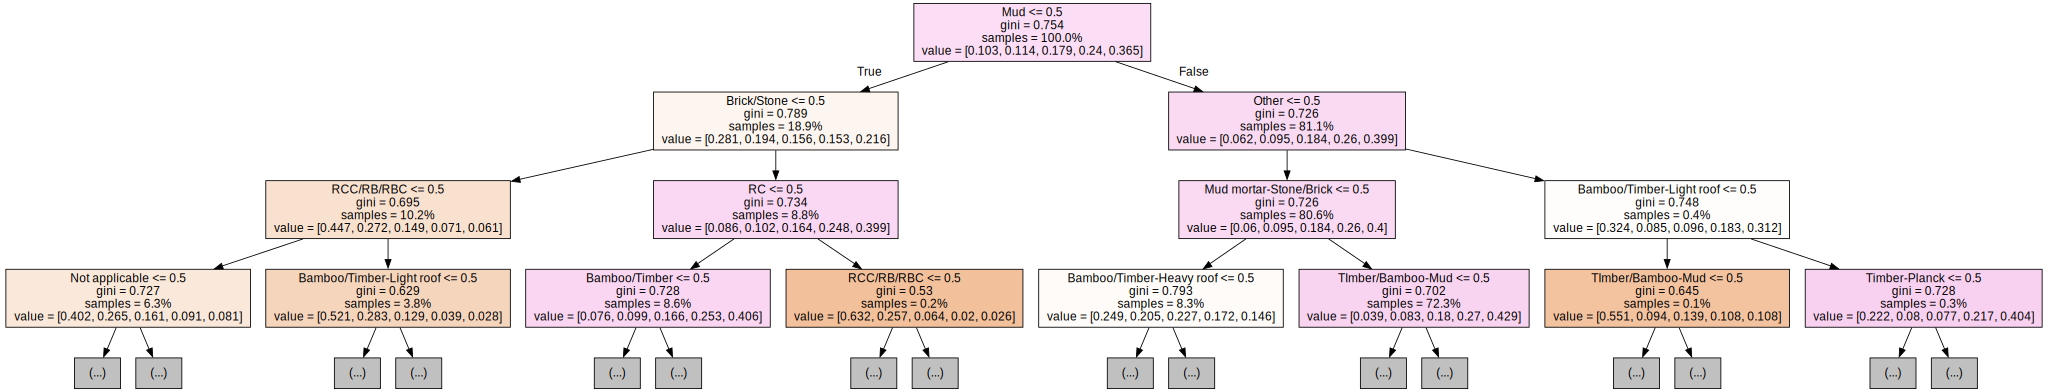

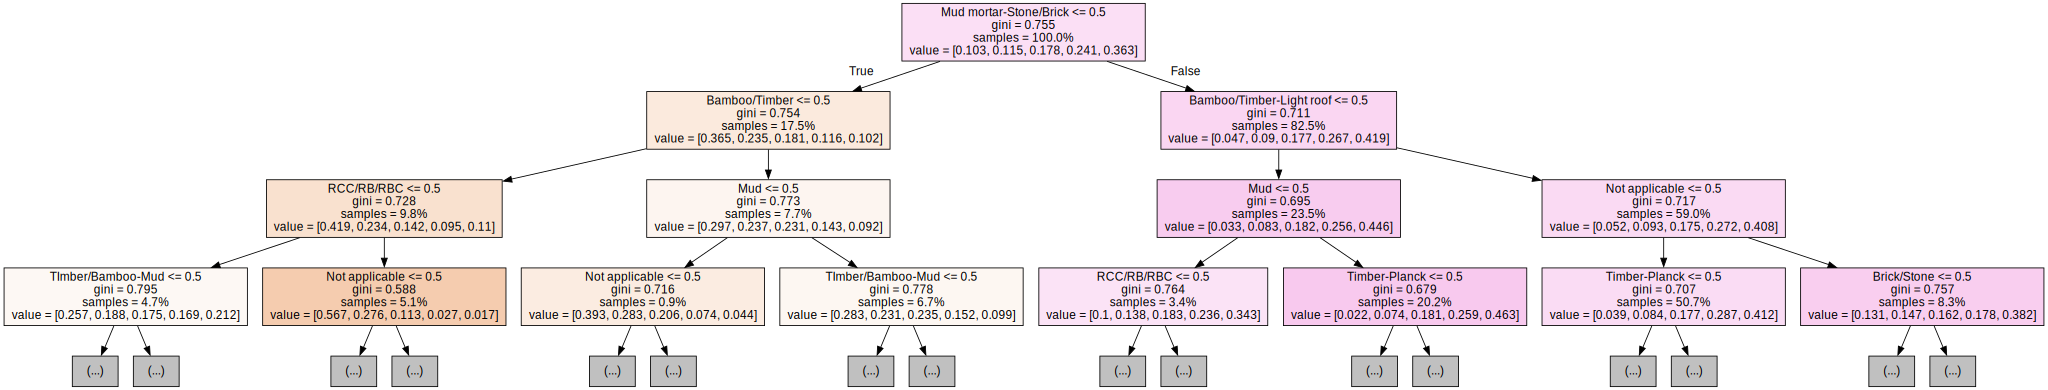

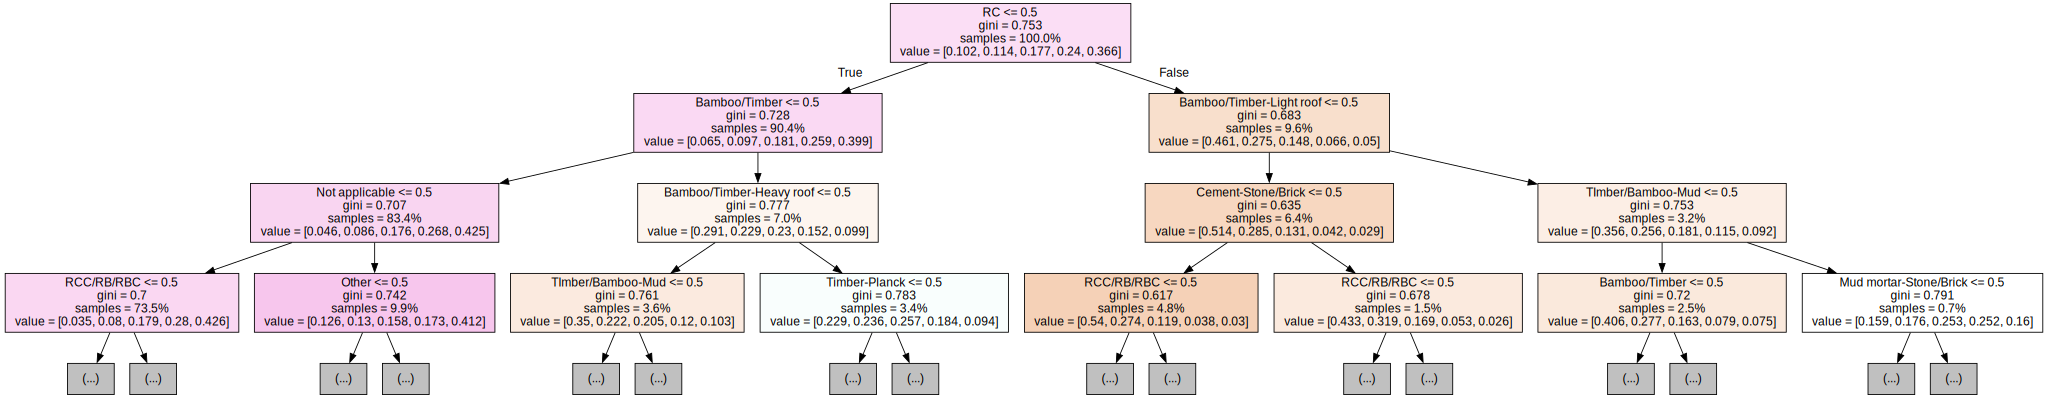

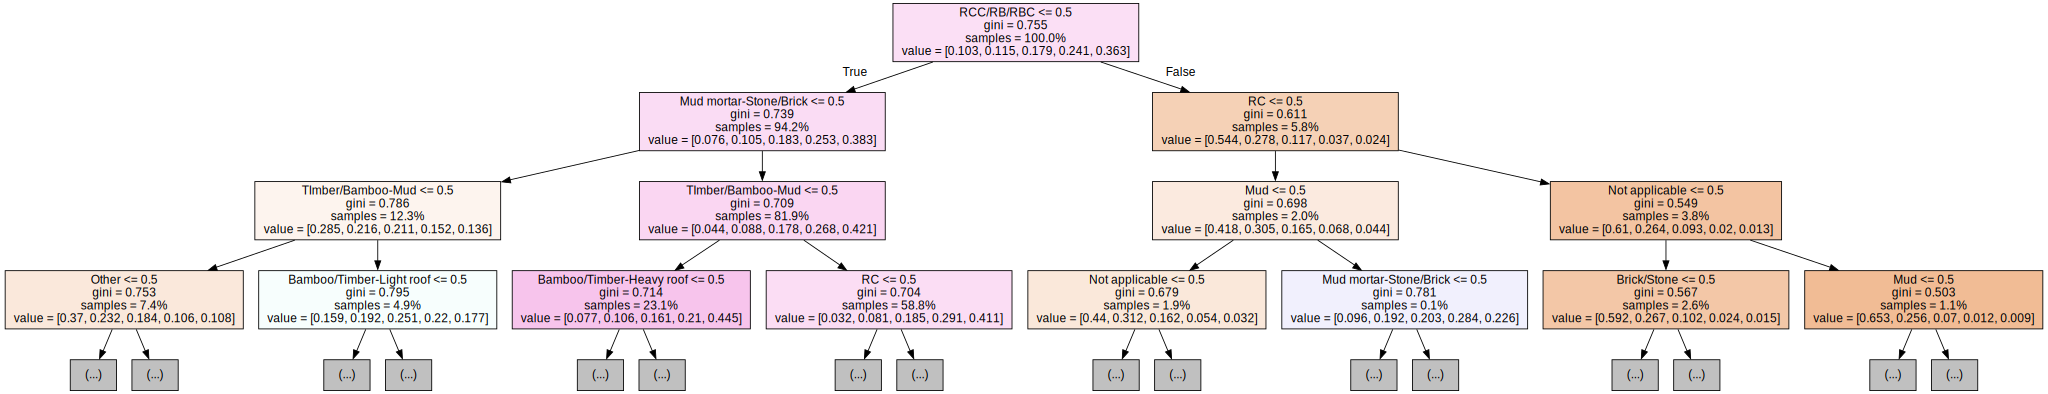

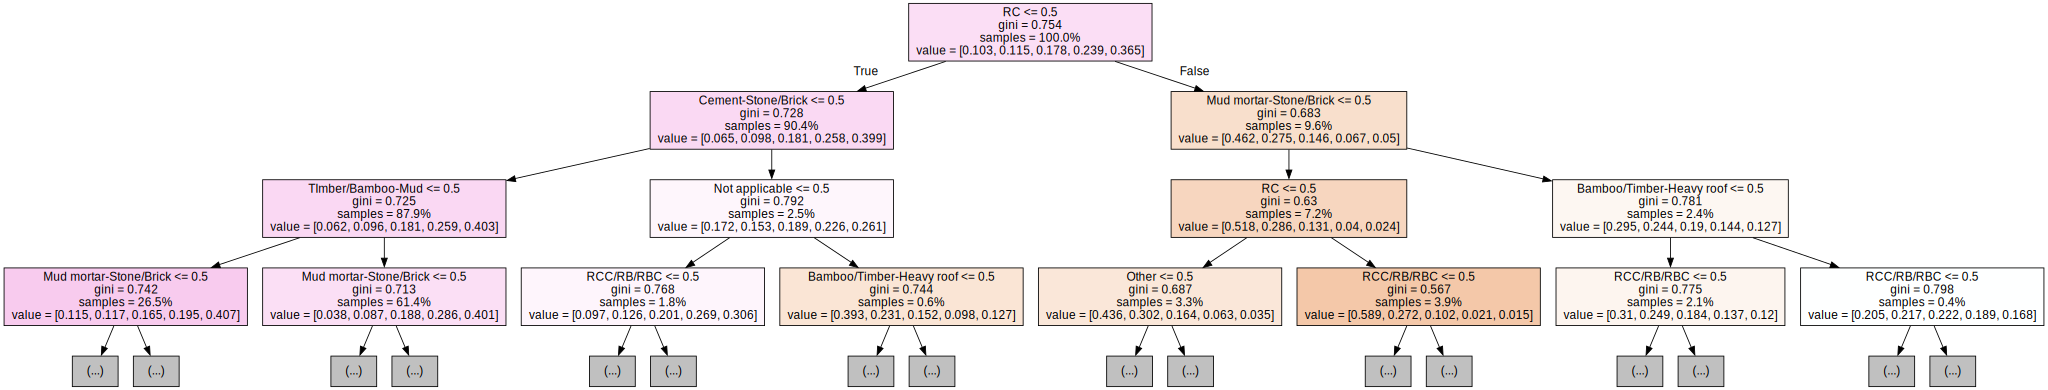

<Figure size 3000x3000 with 0 Axes>

In [58]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<p style="line-height= 1.5">From these 10 Random Forest trees, the most popular choice is Bamboo/Timber across all 4 variables. The second most popular choice is Reinforced Concrete (RC). According to the trees, there are no runner-ups to the first two choices this time.</p>

<p style="line-height= 1.5"> By comparing with the Chi Square value result earlier, we can confirm that Reinforced Concrete (RC) is an primary contributor to a building's damage grade. However, the most unexpected result was with Bamboo/Timber materials as it ranked the lowest in terms of importance level against damage grade.</p>

## Answer to main problem statement
### Main problem statement: "Which building materials contribute to the building's damage grade?"

<p style="line-height= 1.5"> For a building's superstructure, Cement-Mortar Brick and RC Non Engineered materials have the most effect on a building's damage grade.  Additionally, for a building's foundation, Reinforced Concrete and Bamboo/Timber materials have the most effect on a building's damage grade.  However, the accuracy of this conclusion is fairly low, an accuracy score of around 0.4.  We arrived at this conclusion by building the Random Forest Model, supported with Chi Square and Logistic Regression methods.</p>


## Now to tackle our second problem
### Second problem statement: "Does building age contribute to damage grade?"

<p style="line-height= 1.5"> In order to determine whether building age can contribute to damage grade, we will use the Random Forest Model to decide by popularity whether it will contribute by add building age to both superstructure material data set and building foundation variable data set. 


### Superstructure matched with building age

In [59]:
merge = pd.concat([bldg_age, ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(train_pred)
accuracy = accuracy_score(train_resp, predictor)
print('Accuracy of Random Forest on train set: {:.2f}'.format(accuracy))
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Random Forest on test set: {:.2f}'.format(accuracy))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,predictor))

Accuracy of Random Forest on train set: 0.44
Accuracy of Random Forest on test set: 0.42
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.48      0.62      0.54      9509
     Grade 2       0.28      0.03      0.06     10479
     Grade 3       0.27      0.05      0.08     16352
     Grade 4       0.31      0.05      0.09     22000
     Grade 5       0.43      0.93      0.59     32736

    accuracy                           0.42     91076
   macro avg       0.35      0.34      0.27     91076
weighted avg       0.36      0.42      0.31     91076



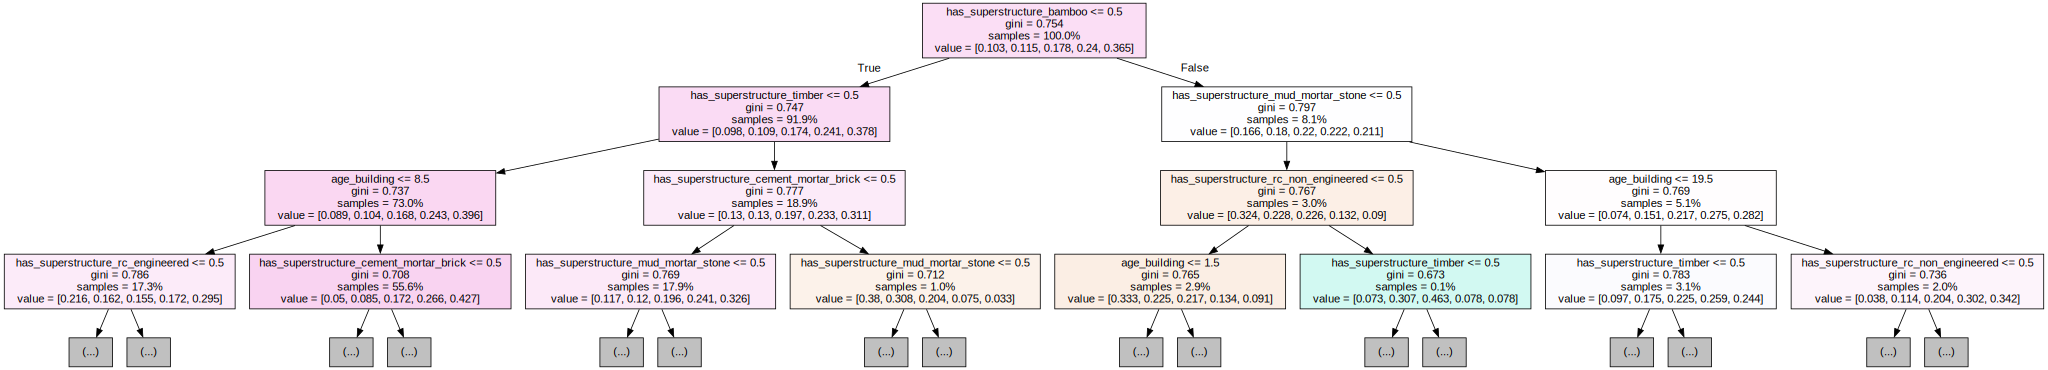

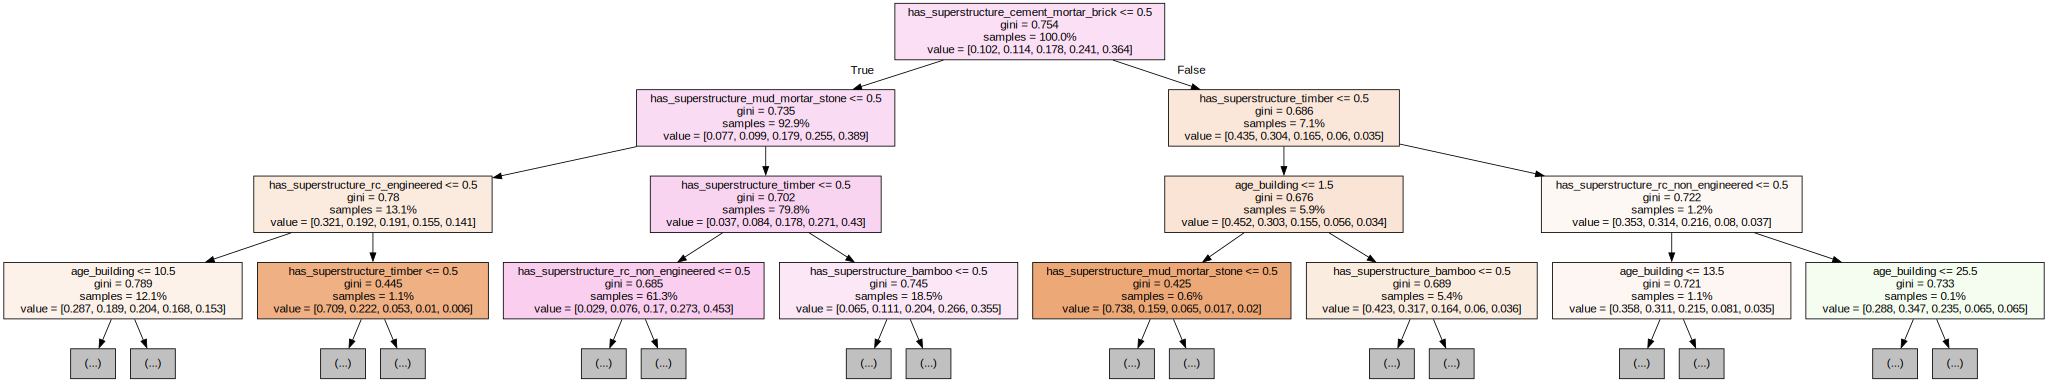

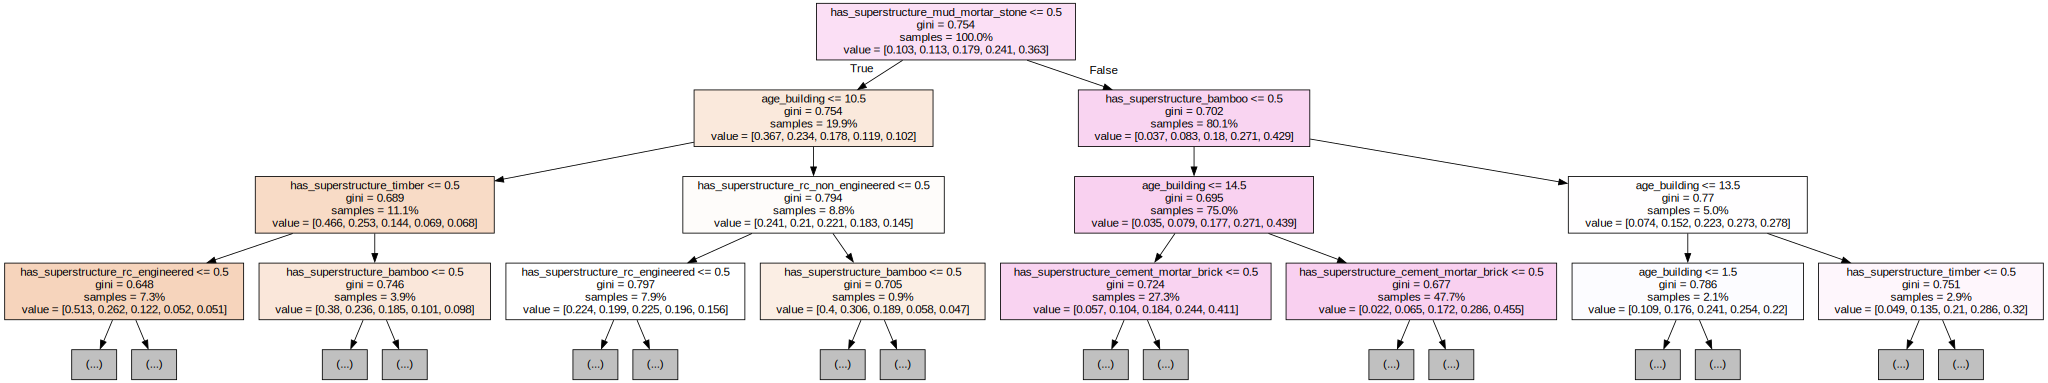

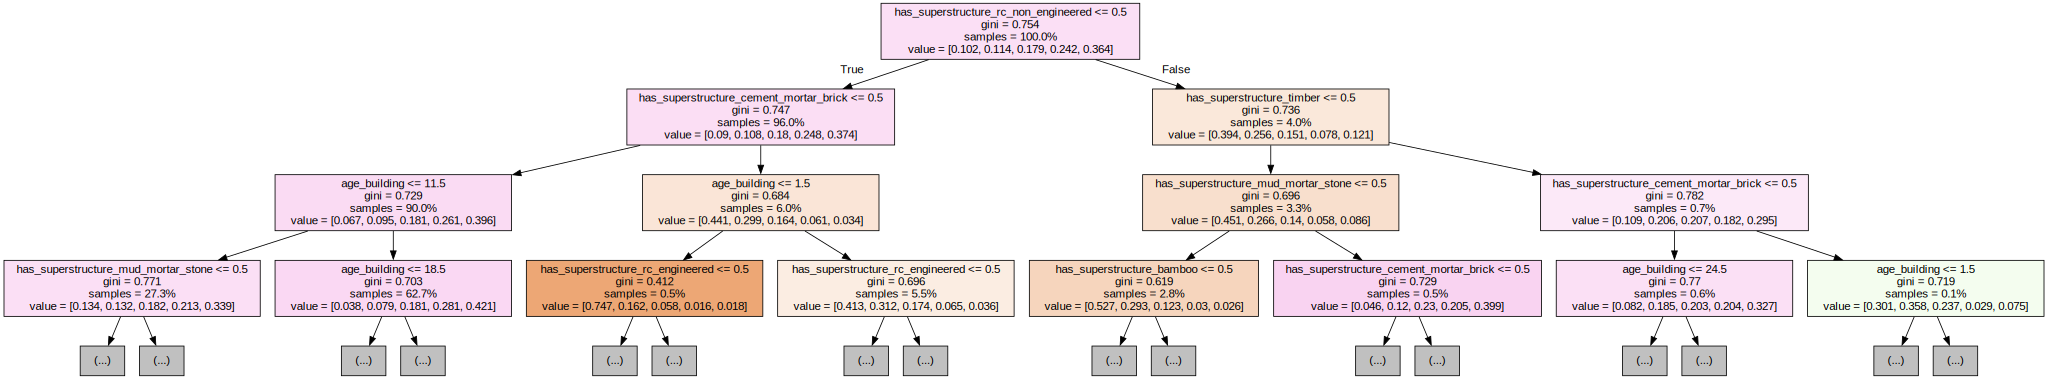

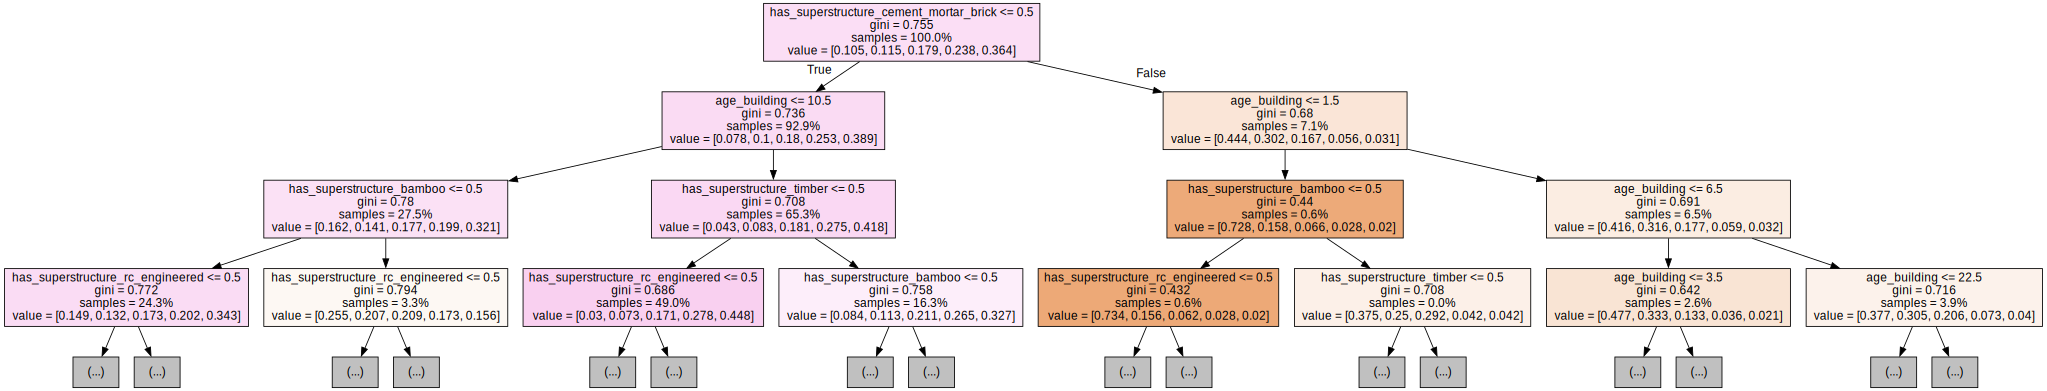

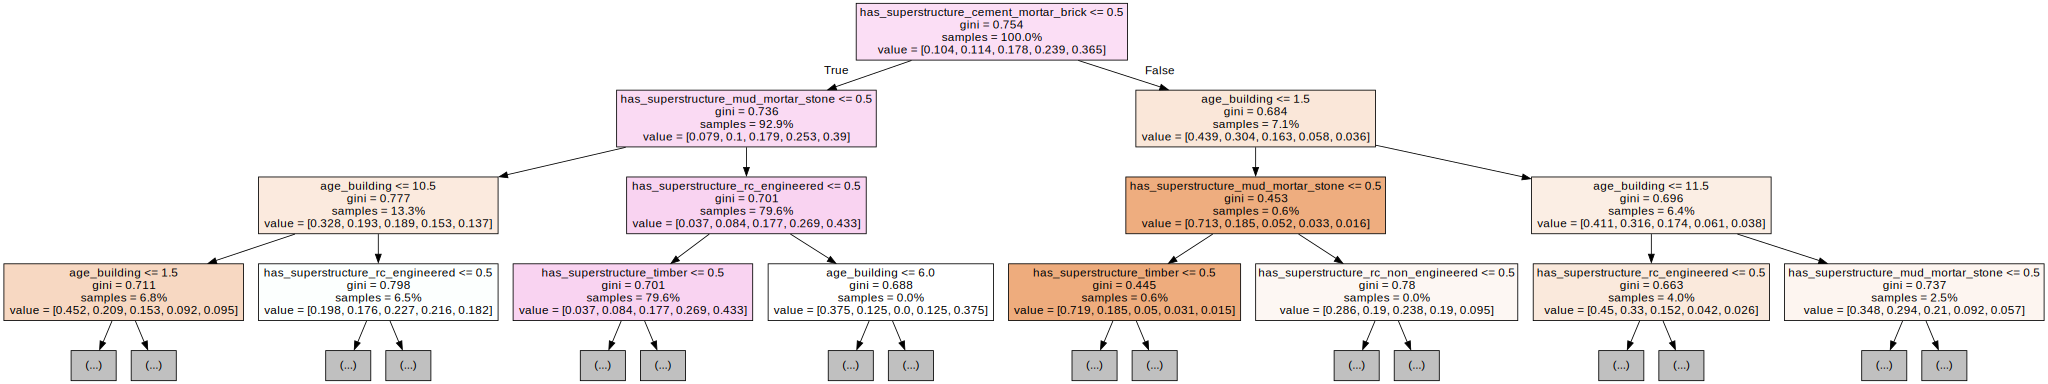

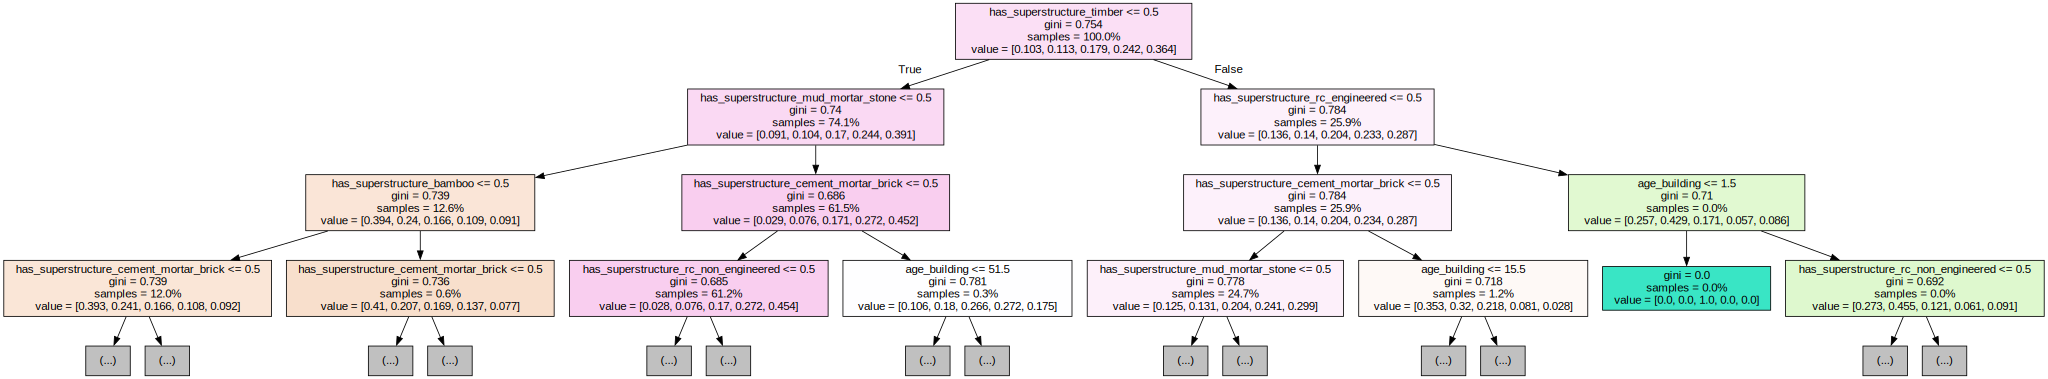

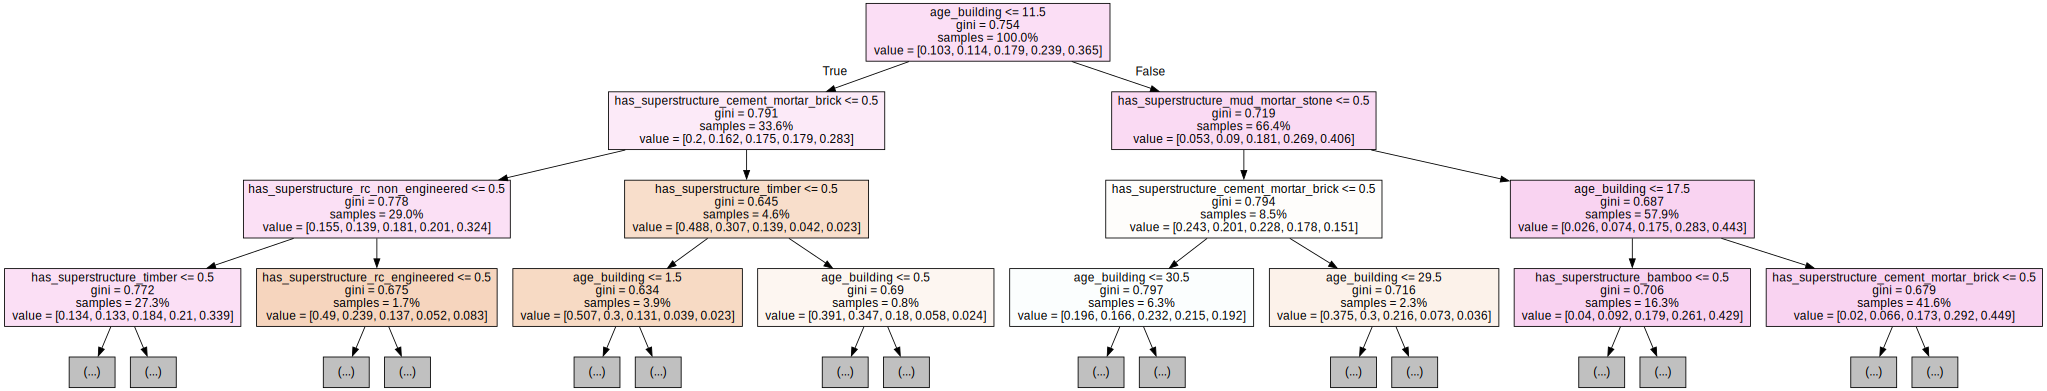

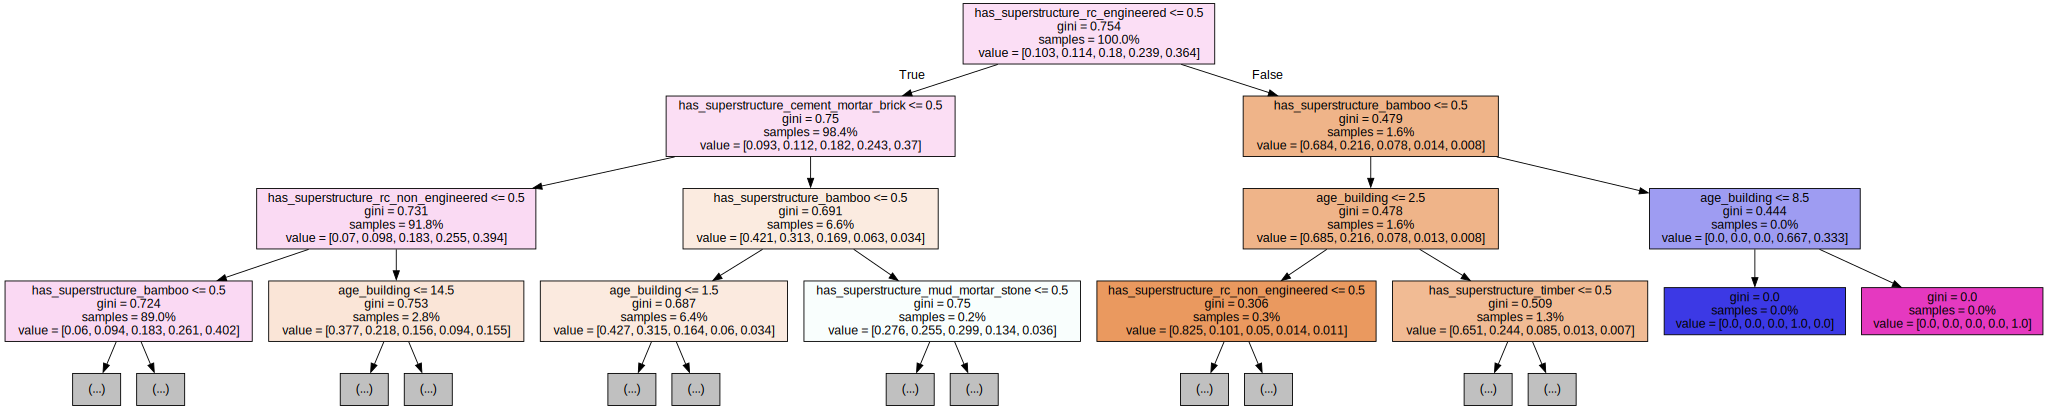

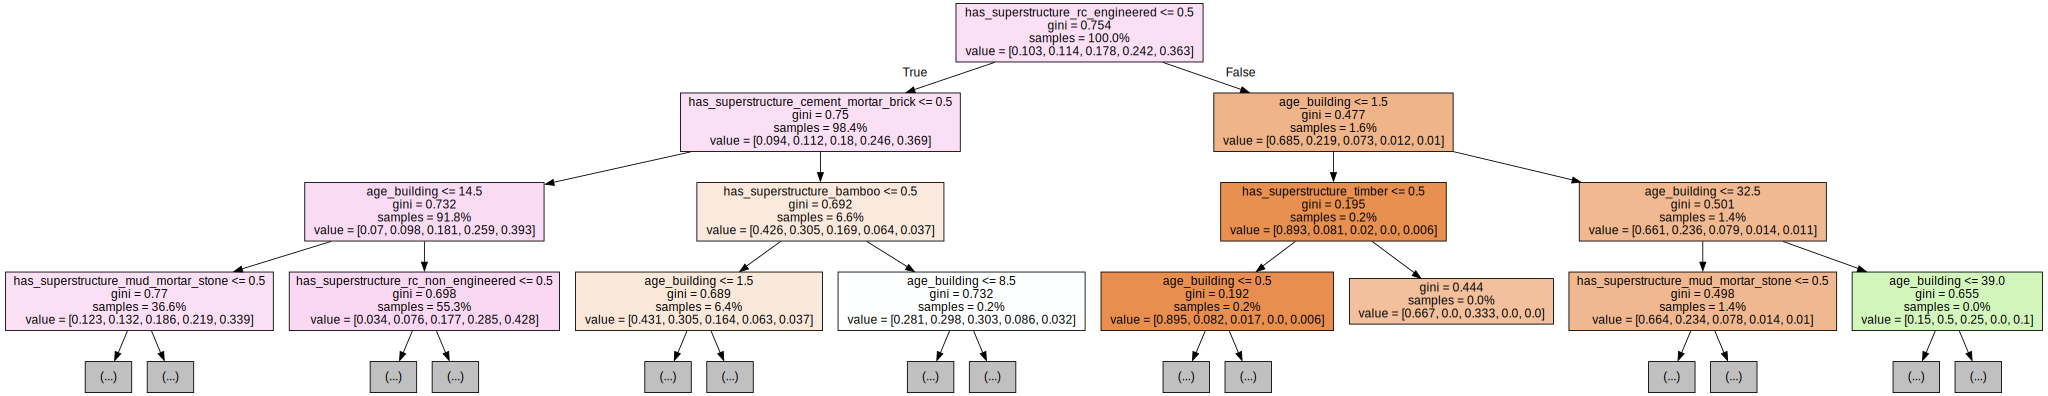

<Figure size 3000x3000 with 0 Axes>

In [60]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Building foundation variables matched with building age

In [61]:
merge = pd.concat([bldg_age, foundation_type_encoded, gf_type_encoded, otherFloor_type_encoded, roof_type_encoded], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(train_pred)
accuracy = accuracy_score(train_resp, predictor)
print('Accuracy of Random Forest on train set: {:.2f}'.format(accuracy))
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Random Forest on test set: {:.2f}'.format(accuracy))
print("------------------------------------------")
print("Classification Report")
print(classification_report(test_resp,predictor))

Accuracy of Random Forest on train set: 0.44
Accuracy of Random Forest on test set: 0.42
------------------------------------------
Classification Report
              precision    recall  f1-score   support

     Grade 1       0.50      0.54      0.52      9509
     Grade 2       0.29      0.07      0.12     10479
     Grade 3       0.26      0.05      0.08     16352
     Grade 4       0.32      0.05      0.09     22000
     Grade 5       0.43      0.93      0.58     32736

    accuracy                           0.42     91076
   macro avg       0.36      0.33      0.28     91076
weighted avg       0.36      0.42      0.31     91076



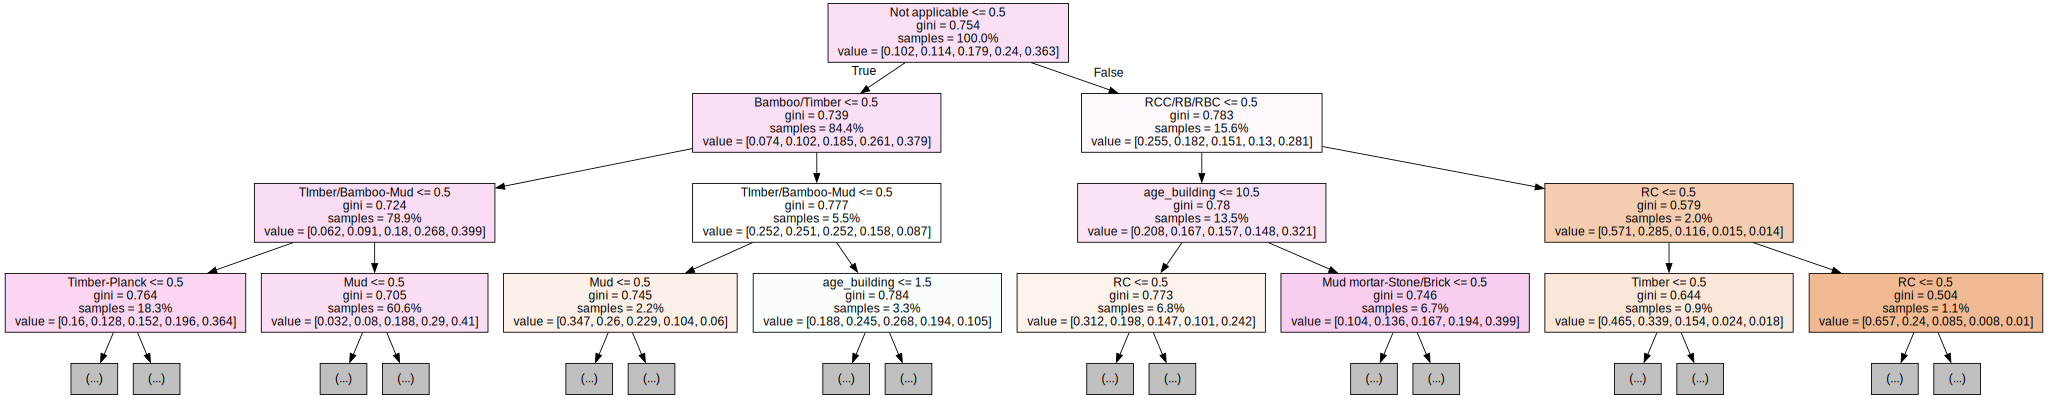

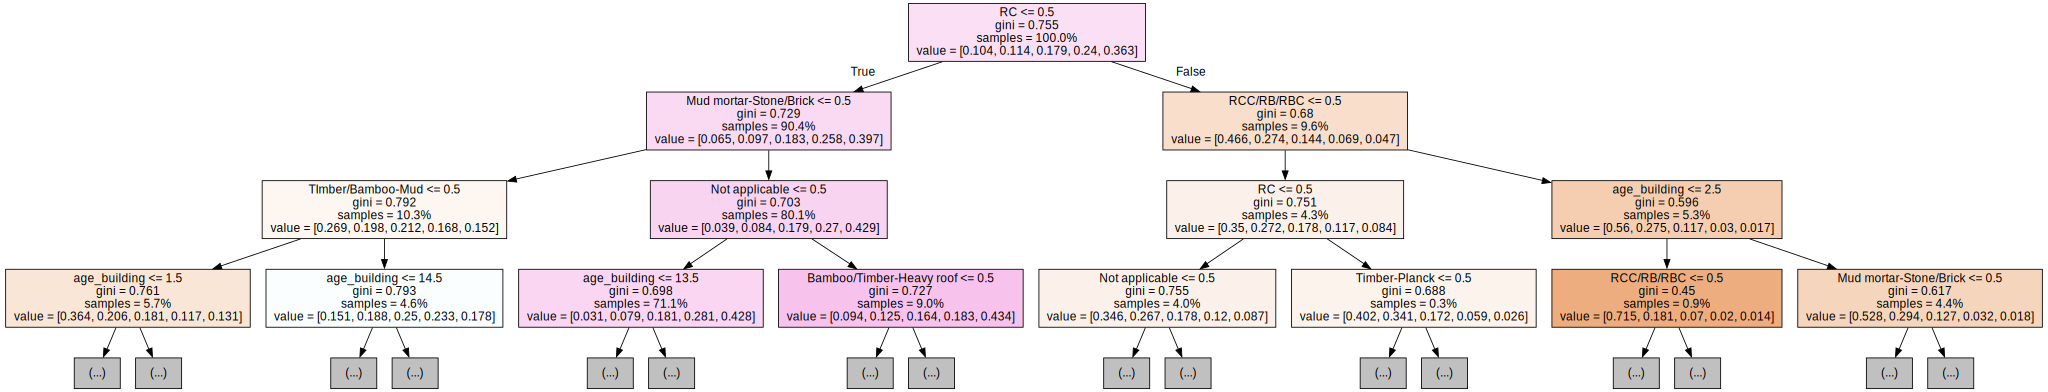

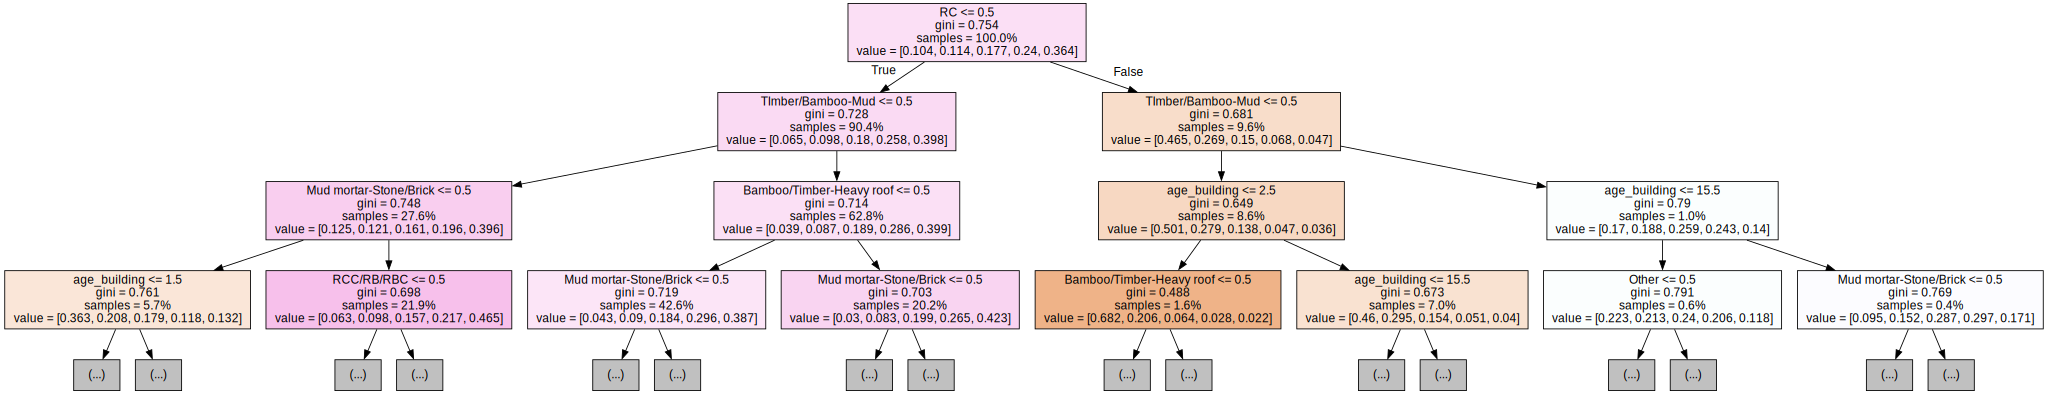

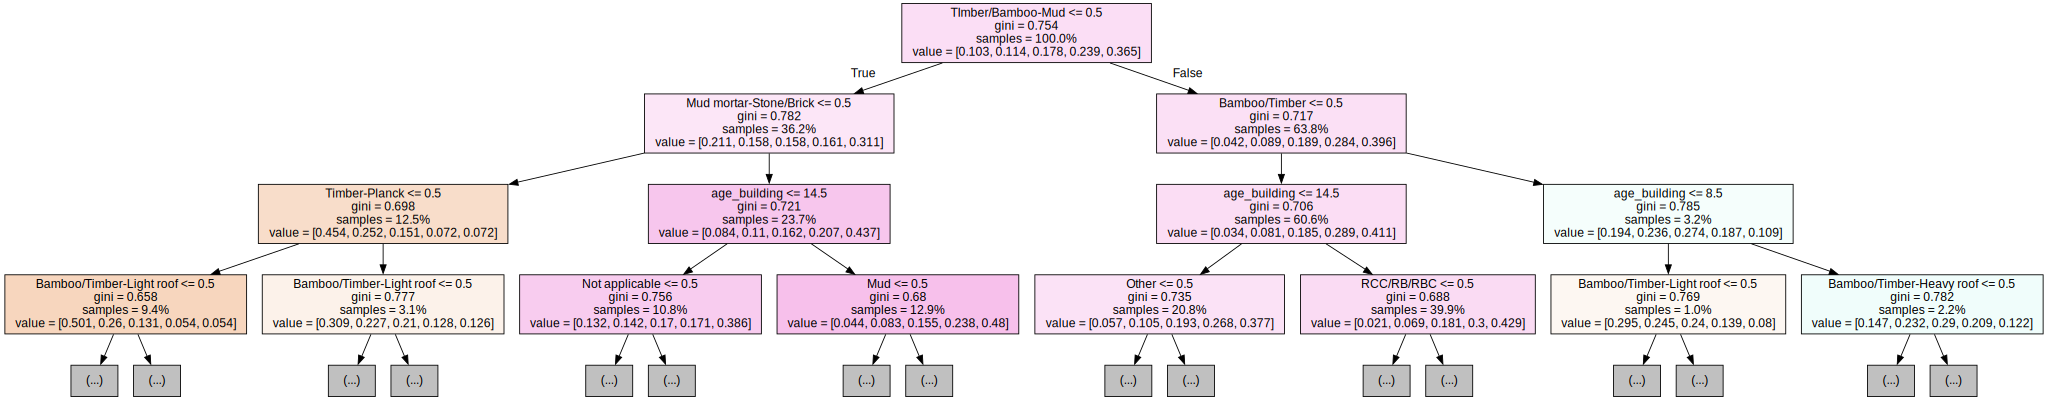

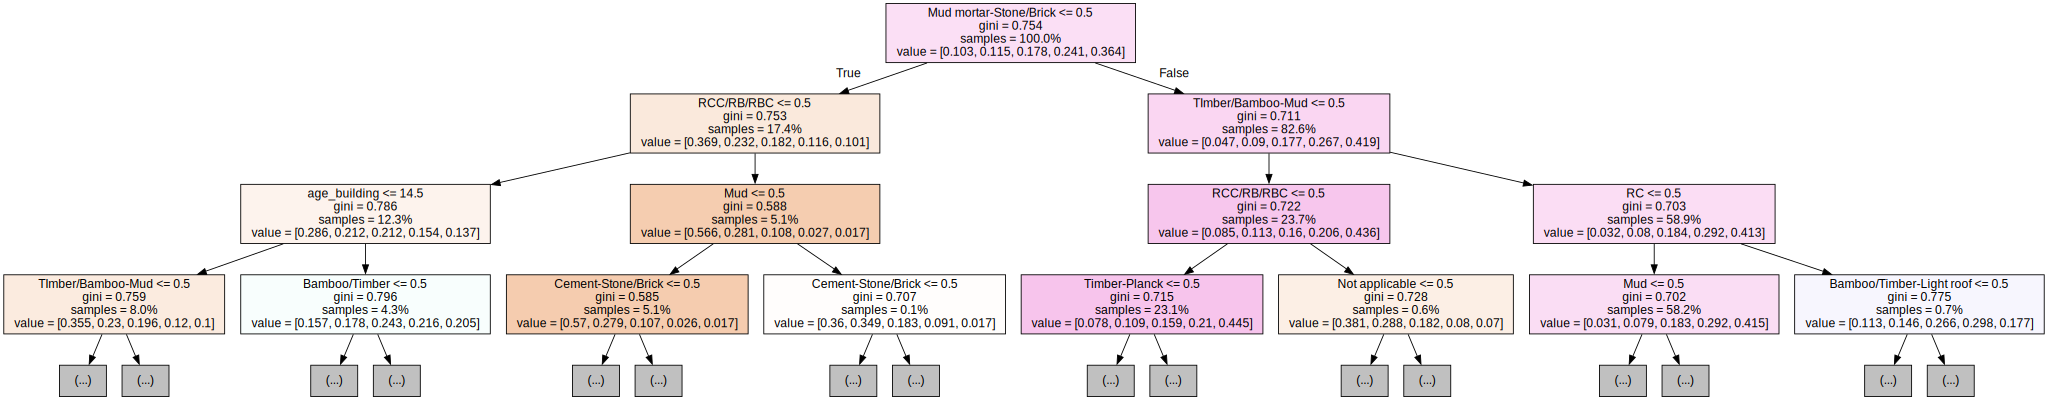

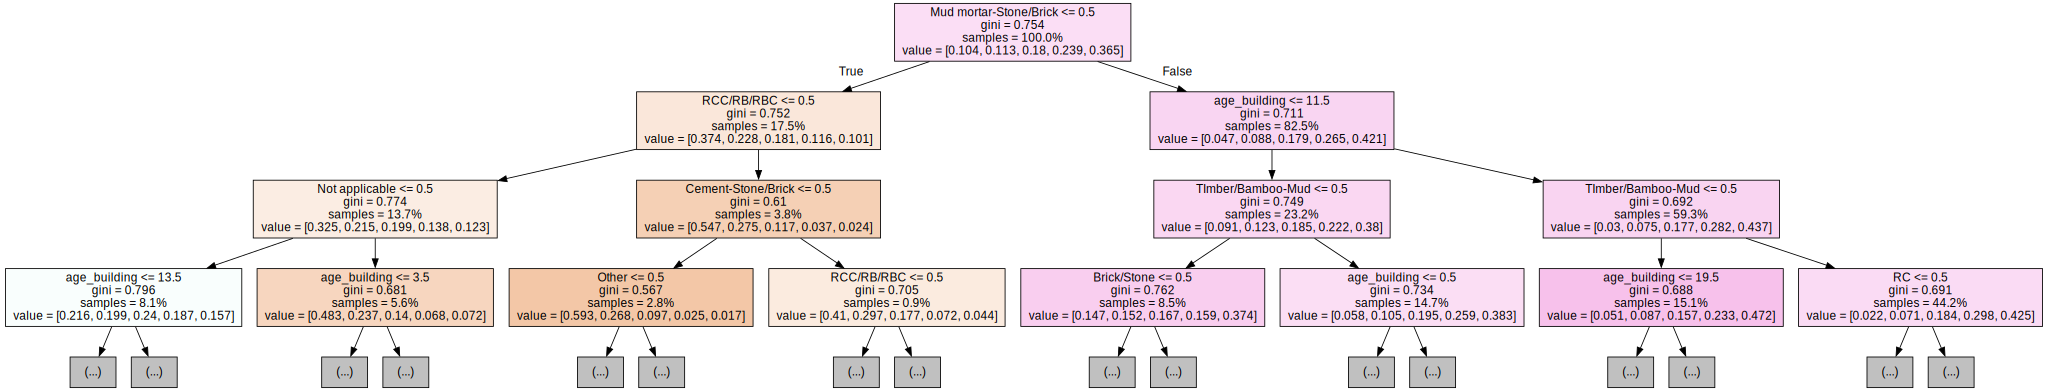

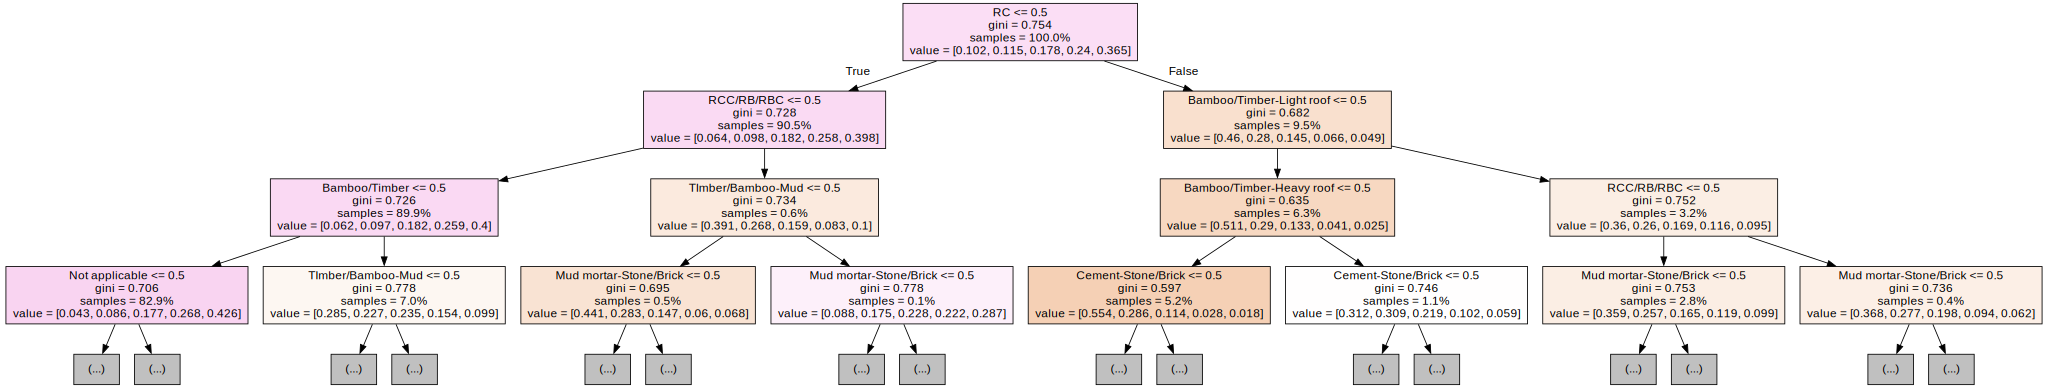

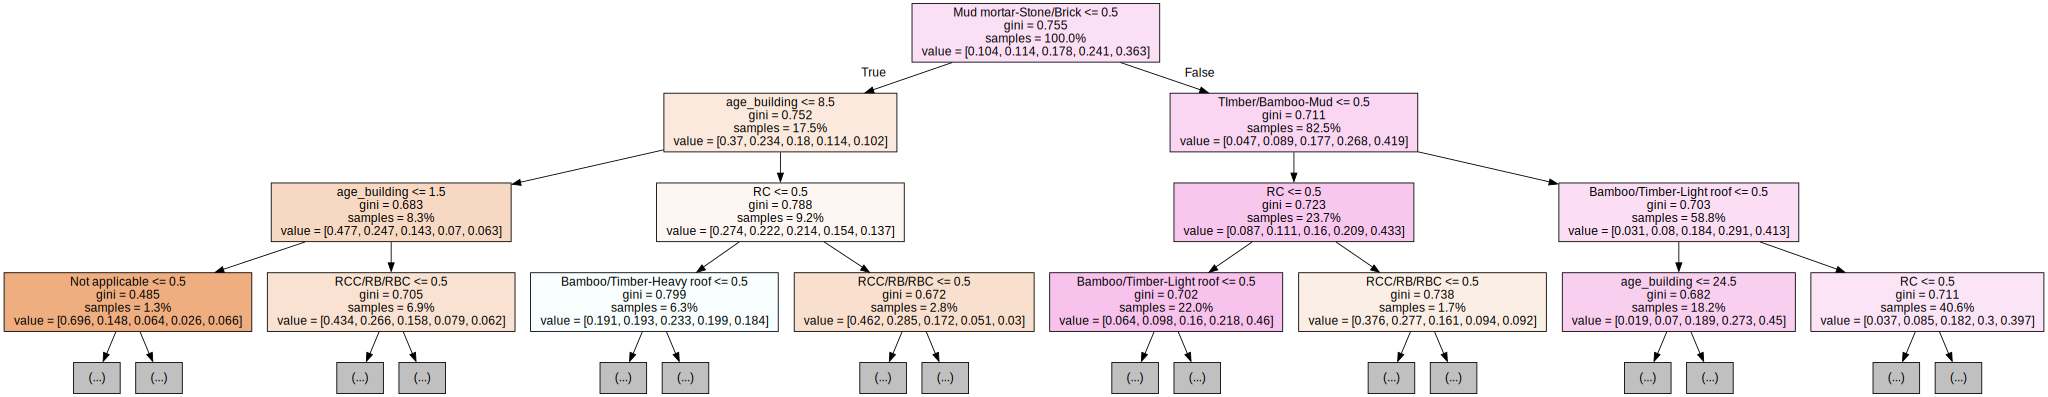

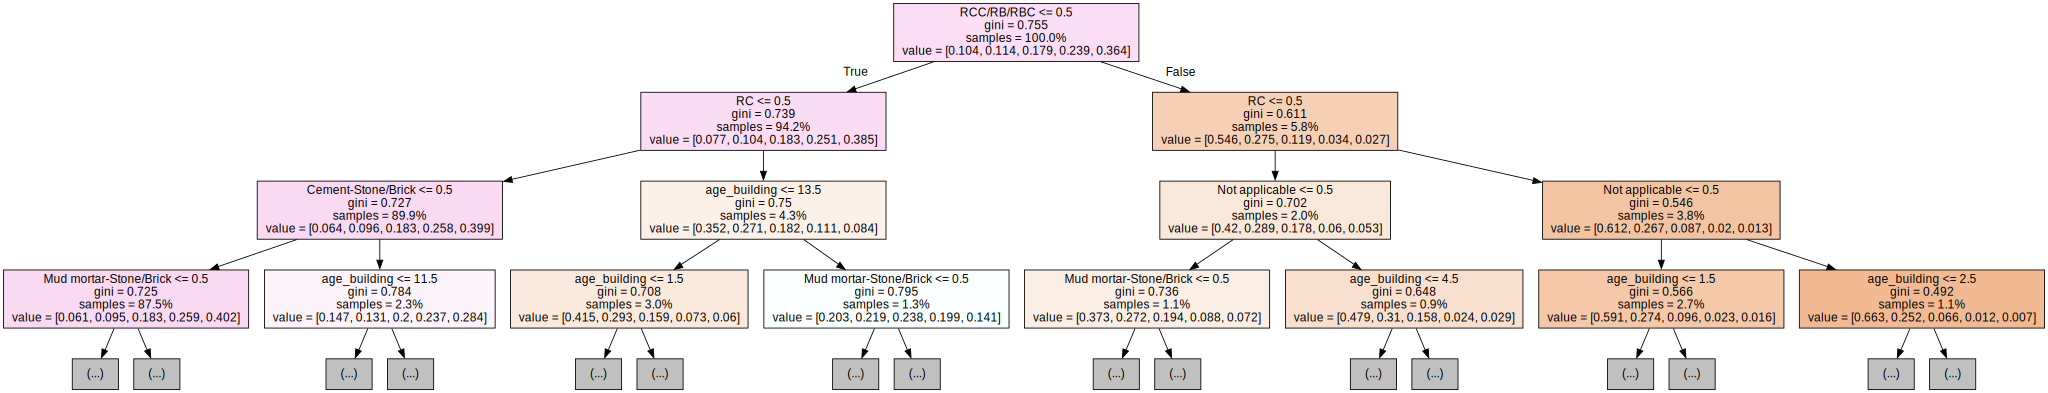

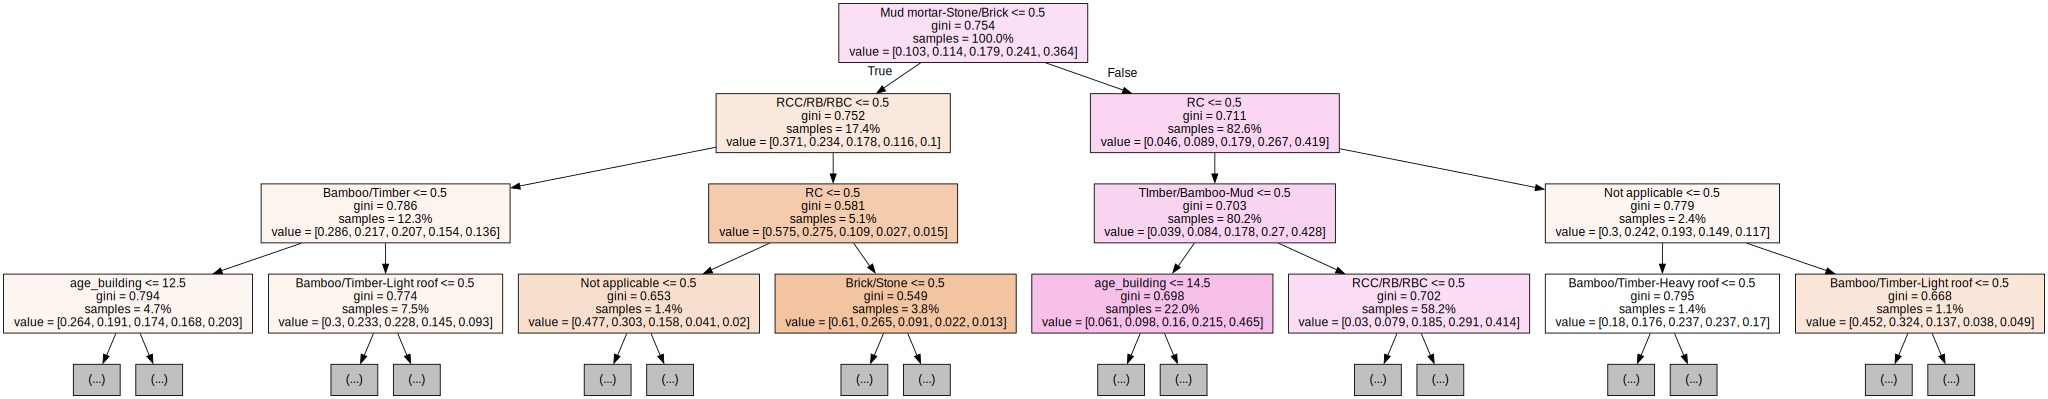

<Figure size 3000x3000 with 0 Axes>

In [62]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<p style="line-height= 1.5"> As we can see, the Random Forest trees most popular choice is building age when placed together with superstructure variables as an predictor for damage grade. It overtook the other superstructure materials as a contributor.</p> 

<p style="line-height= 1.5"> However, when looking back at the Chi Square value results, building age has an extremely higher value than the other variables. Hence, there is a skewed bias for building age, but our conclusion is still sound since in our EDA step, we saw that the damage grades of 1 to 5 are spread across the range of building age.</p>

<p style="line-height= 1.5">Although, when placing building age together with the variables related to a building's foundation, building age was not a solid choice to predict damage grade. This also does not compare well when looking at the Chi Square value again.</p>

<p style="line-height= 1.5"> From this, "Does building age contribute to damage grade?". Based on the Random Forest tree results, our group's deems that building age may be an contributor. Similarly, in the real world, there are historical buildings which have stood for hundreds of years, and during earthquakes they may receive some damage. Hence, our conclusion is that building age can be a contributor, but not a significant one.</p>

## Conclusion

<p style="line-height= 1.5"> 
To conclude, going by the popular choice of the Random Forest Model, the materials that contribute to building damage are the superstructure materials: Reinforced Concrete (RC) Non-engineered and Cement-Mortar Brick; and the building foundation materials: RC Engineered and Bamboo or Timber. Concurrently, our Random Forest showed us that building age may contribute to building damage. In reality, this result does make sense since several historical buildings or architectures encounter damages due to corrosion or deterioration of the material used in its construction.</p>

<p style="line-height= 1.5"> Based on the metrics of the Random Forest Model, for both problem statements, it compares well against our baseline model which is Logistic Regression. The Random Forest Model's accuracy has a similar accuracy to the Logistic Regression Model. At the same time, some of the F1 scores of the Logistic Regression Model is reflected in the Random Forest models. However, in terms of the model's fitting, our group has deemed our models to be underfitting. Looking back at our accuracy scores for both machine learning model's train and test sets, they are quite low. (Score of around 0.4) Hence, it is a sign of underfitting. Although, we expected the possibility of underfitting since we are using only categorical data as estimators or predictors are not sufficient in generating a reliable prediction. As seen earlier, the variables that are useful to predict damage grade are categorical data. Our conclusion will hold true only under the condition that we consider the lack of numerical data as an unchangeable fallacy of our model and apply some real world concepts or facts to back up its findings.</p>

<p style="line-height= 1.5">
The limitations of our models, specifically the Random Forest Model, is that it is underfitting.  This leads to poor performance of our model and is not the recommended model used to predict damage grade in our dataset, comprised mainly of categorical data. As shown above, our dataset is composed mainly of categorical data. Consequently, to tackle these limitations, our group agrees that using a numerical dataset for our models would improve the results and better classify our data. Furthermore, we suggest using a new method called Gradient Boosting to help handle and reduce any bias error in our dataset. Moreover, it is a suitable technique for our problem, as it can manage large datasets. On the side note, maybe additional numerical data that is relevant to our problem could help us obtain a better model overall.
</p>
